In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.color_palette("pastel")
warnings.filterwarnings('ignore')
brown_colors = ["#3c291f", "#FF0000"]
SEED = 42

In [2]:
df = pd.read_csv('../data/dataset.csv', na_values=['None'])
display(df.head())


def divLine():
    print('-' * 50)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


--------------------------------------------------
Invalid WHOIS_REGDATE

2002-03-20T23:59:59.0Z
2002-03-20T23:59:59.0Z
2002-03-20T23:59:59.0Z
2002-03-20T23:59:59.0Z
b
0
b
2002-03-20T23:59:59.0Z
--------------------------------------------------
Invalid WHOIS_UPDATED_DATE

2017-03-07T22:02:38.0Z
2017-03-07T22:02:38.0Z
2017-03-07T22:02:38.0Z
2017-03-07T22:02:38.0Z
2017-03-07T22:02:38.0Z
--------------------------------------------------
Missing values in each column


,0
CHARSET,7
SERVER,176
WHOIS_COUNTRY,306
WHOIS_STATEPRO,362
URL_LENGTH,0
NUMBER_SPECIAL_CHARACTERS,0
CONTENT_LENGTH,812
TCP_CONVERSATION_EXCHANGE,0
DIST_REMOTE_TCP_PORT,0
REMOTE_IPS,0


--------------------------------------------------
Dataframe shape:  (1780, 28)
--------------------------------------------------
Variable data types
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
WHOIS_REGDATE_YEAR             Int64
WHOIS_REGDATE_MONTH            Int64
WHOIS_REGDATE_DAY              Int64
WHOIS_REGDATE_HOUR             Int64
WHOIS_REGDATE_MINUTE           Int64
WHOIS_UPDATED_DATE_YEAR        Int6

0    1564
1     216
Name: Type, dtype: int64

<Figure size 800x800 with 0 Axes>

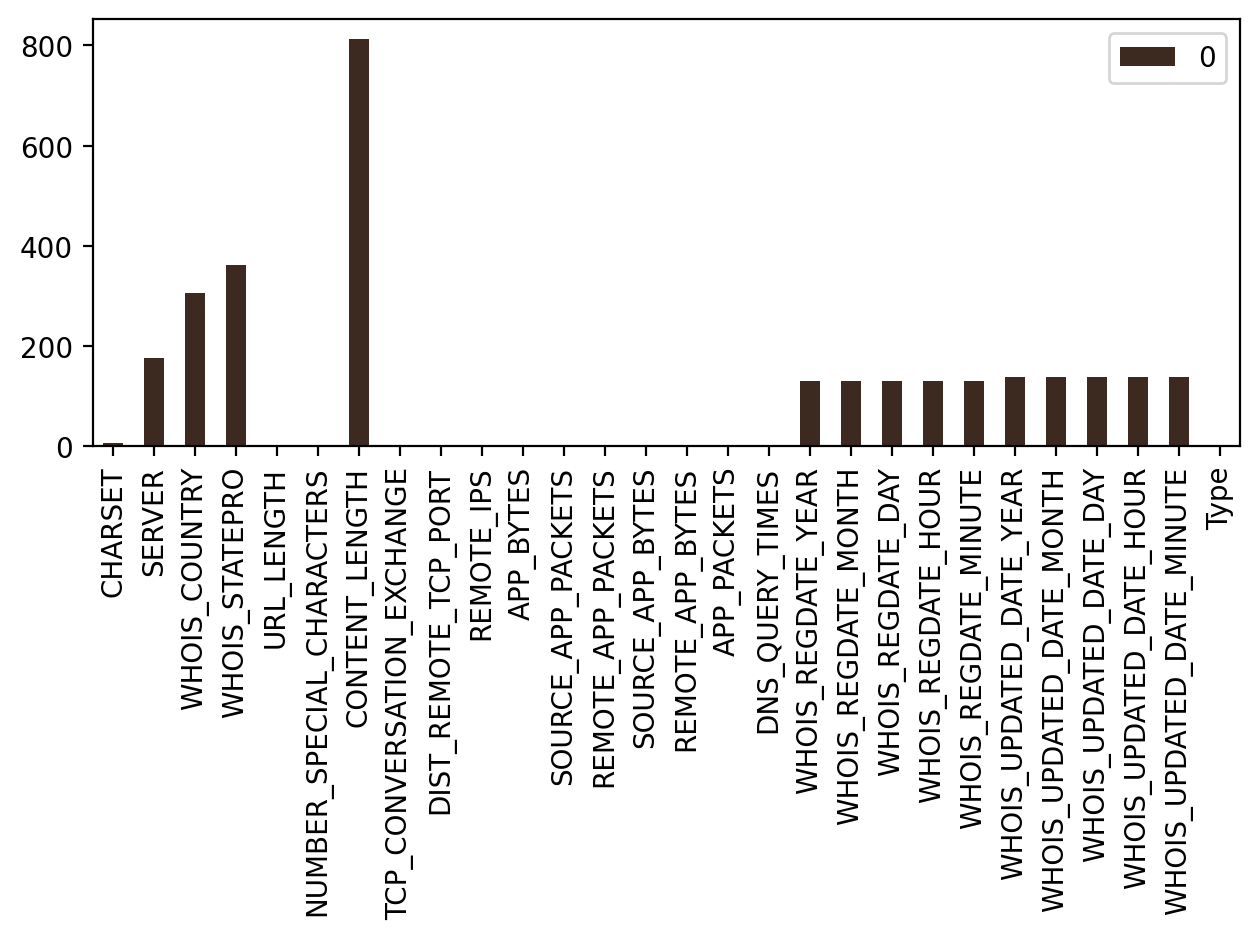

In [3]:
# Visualize the invalid data
divLine()
print('Invalid WHOIS_REGDATE\n')
for i in df['WHOIS_REGDATE']:
    if pd.isna(i):
        continue
    else:
        try:
            res = datetime.strptime(i, '%d/%m/%Y %H:%M')
        except:
            print(i)
divLine()
print('Invalid WHOIS_UPDATED_DATE\n')
for i in df['WHOIS_UPDATED_DATE']:
    if pd.isna(i):
        continue
    else:
        try:
            res = datetime.strptime(i, '%d/%m/%Y %H:%M')
        except:
            print(i)

# Replace invalid dates
df.loc[(df['WHOIS_REGDATE'] == 'b') | (df['WHOIS_REGDATE'] == '0'),
       'WHOIS_REGDATE'] = pd.NA
df.loc[df['WHOIS_REGDATE'] == '2002-03-20T23:59:59.0Z',
       'WHOIS_REGDATE'] = '20/03/2002 23:59'

df.loc[df['WHOIS_UPDATED_DATE'] == '2017-03-07T22:02:38.0Z',
       'WHOIS_UPDATED_DATE'] = '07/03/2017 22:02'
df['WHOIS_REGDATE'] = pd.to_datetime(df['WHOIS_REGDATE'],
                                     infer_datetime_format=True)
df['WHOIS_UPDATED_DATE'] = pd.to_datetime(df['WHOIS_UPDATED_DATE'],
                                          infer_datetime_format=True)

# Extract the year, month, day, hour, minutes
df['WHOIS_REGDATE_YEAR'] = df['WHOIS_REGDATE'].dt.year.astype('Int64')
df['WHOIS_REGDATE_MONTH'] = df['WHOIS_REGDATE'].dt.month.astype('Int64')
df['WHOIS_REGDATE_DAY'] = df['WHOIS_REGDATE'].dt.day.astype('Int64')
df['WHOIS_REGDATE_HOUR'] = df['WHOIS_REGDATE'].dt.hour.astype('Int64')
df['WHOIS_REGDATE_MINUTE'] = df['WHOIS_REGDATE'].dt.minute.astype('Int64')

df['WHOIS_UPDATED_DATE_YEAR'] = df['WHOIS_UPDATED_DATE'].dt.year.astype(
    'Int64')
df['WHOIS_UPDATED_DATE_MONTH'] = df['WHOIS_UPDATED_DATE'].dt.month.astype(
    'Int64')
df['WHOIS_UPDATED_DATE_DAY'] = df['WHOIS_UPDATED_DATE'].dt.day.astype('Int64')
df['WHOIS_UPDATED_DATE_HOUR'] = df['WHOIS_UPDATED_DATE'].dt.hour.astype(
    'Int64')
df['WHOIS_UPDATED_DATE_MINUTE'] = df['WHOIS_UPDATED_DATE'].dt.minute.astype(
    'Int64')

# Drop the original datetime and URL column, order by: categorical -> numerical-> outcome
df = df[[
    'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'URL_LENGTH',
    'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
    'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
    'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
    'APP_PACKETS', 'DNS_QUERY_TIMES', 'WHOIS_REGDATE_YEAR',
    'WHOIS_REGDATE_MONTH', 'WHOIS_REGDATE_DAY', 'WHOIS_REGDATE_HOUR',
    'WHOIS_REGDATE_MINUTE', 'WHOIS_UPDATED_DATE_YEAR',
    'WHOIS_UPDATED_DATE_MONTH', 'WHOIS_UPDATED_DATE_DAY',
    'WHOIS_UPDATED_DATE_HOUR', 'WHOIS_UPDATED_DATE_MINUTE', 'Type'
]]

divLine()
print('Missing values in each column')
na_count_df = pd.DataFrame(df.isna().sum())
display(na_count_df)
plt.figure(figsize=(8, 8))
na_count_df.plot.bar(color=brown_colors[0])
plt.tight_layout()
plt.savefig('../figures/NA_count.pdf', dpi=400)
plt.savefig('../figures/NA_count.png', dpi=400)
# Drop the only row
df = df[~df['DNS_QUERY_TIMES'].isna()]
divLine()
print('Dataframe shape: ', df.shape)
divLine()
print('Variable data types')
print(df.dtypes.to_string())
divLine()
print('The target variable is: ', df.columns[-1], '(categorical)')
display(df['Type'].value_counts())


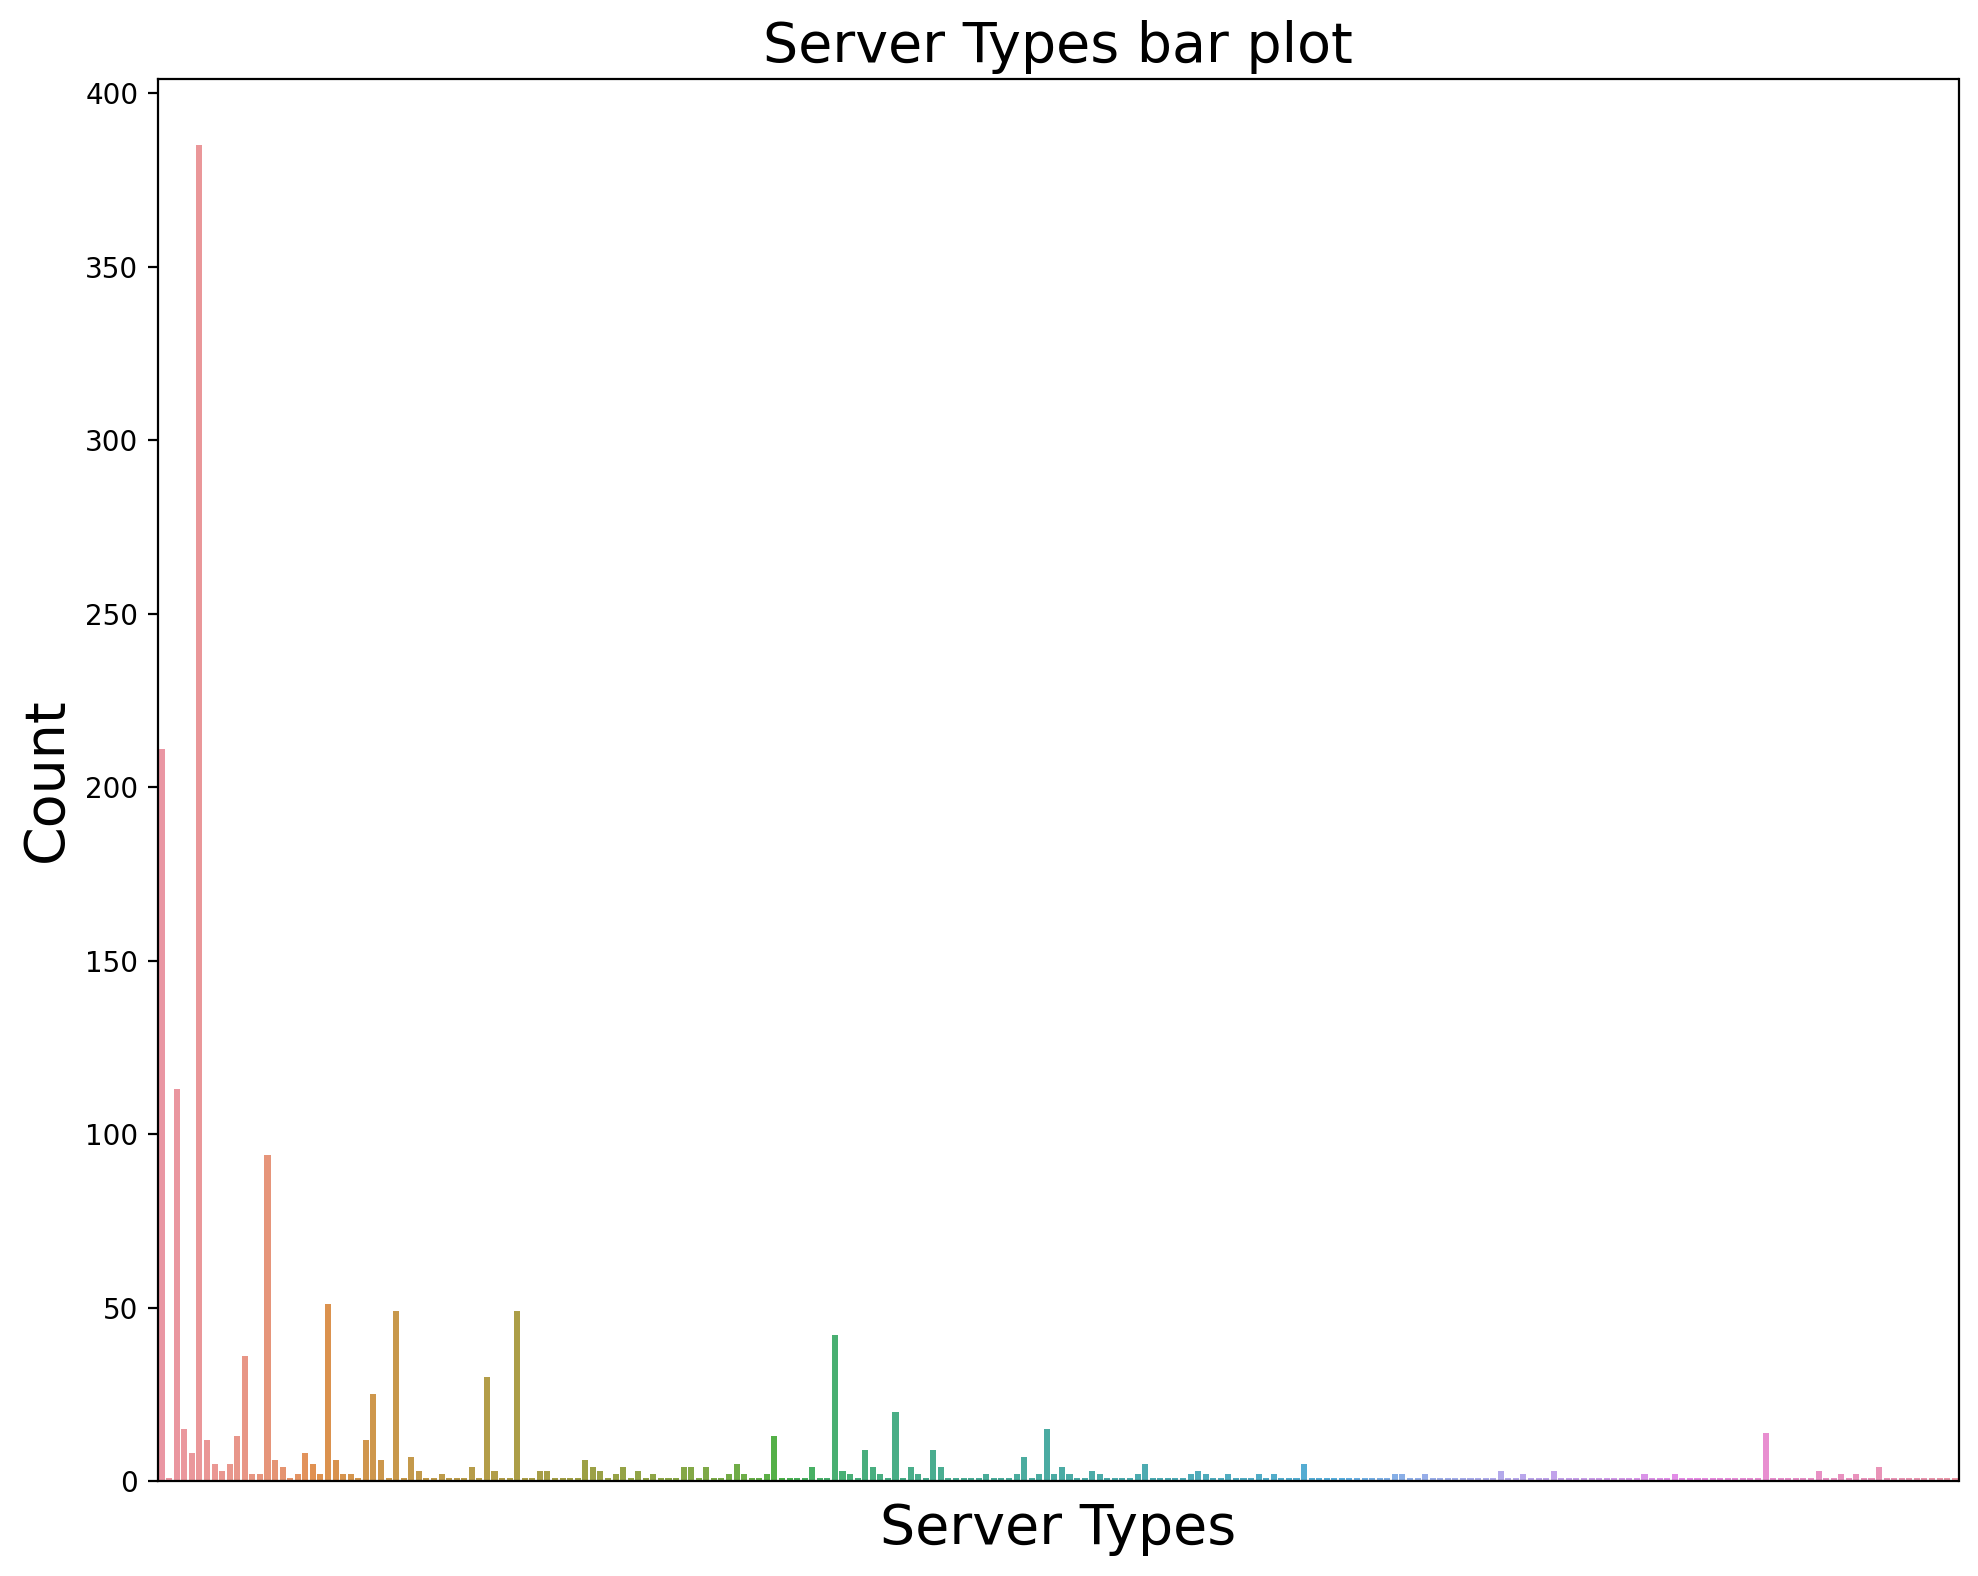

In [4]:
plt.figure(figsize=(10, 8))
sns.countplot(x='SERVER', data=df).tick_params(axis='x',
                                               rotation=90,
                                               labelsize=16)
plt.xticks([])
plt.xlabel('Server Types', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Server Types bar plot', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/SERVER.pdf', dpi=400)
plt.savefig('../figures/SERVER.png', dpi=400)

--------------------------------------------------
Unique values in CHARSET: UTF-8           1054
ISO-8859-1       561
US-ASCII         155
WINDOWS-1251       1
ISO-8859           1
WINDOWS-1252       1
Name: CHARSET, dtype: int64
--------------------------------------------------
Unique values in SERVER (Before tail cutting): 238
Unique values in SERVER (After tail cutting): 6
Unique values in SERVER: OTHER                    750
APACHE                   385
NGINX                    211
MICROSOFT-HTTPAPI/2.0    113
CLOUDFLARE-NGINX          94
MICROSOFT-IIS/7.5         51
Name: SERVER, dtype: int64
--------------------------------------------------
Unique values in WHOIS_COUNTRY (Before tail cutting): 45
Unique values in WHOIS_COUNTRY (After tail cutting): 6
Unique values in WHOIS_COUNTRY: US       1106
OTHER     166
CA         83
ES         63
AU         35
PA         21
Name: WHOIS_COUNTRY, dtype: int64
--------------------------------------------------
Unique values in WHOIS_STATEP

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_REGDATE_YEAR,WHOIS_REGDATE_MONTH,WHOIS_REGDATE_DAY,WHOIS_REGDATE_HOUR,WHOIS_REGDATE_MINUTE,WHOIS_UPDATED_DATE_YEAR,WHOIS_UPDATED_DATE_MONTH,WHOIS_UPDATED_DATE_DAY,WHOIS_UPDATED_DATE_HOUR,WHOIS_UPDATED_DATE_MINUTE
count,1780.000000,1780.000000,968.000000,1780.000000,1780.000000,1780.000000,1.780000e+03,1780.000000,1780.000000,1.780000e+03,...,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000
mean,56.936517,11.109551,11731.291322,16.267978,5.474719,3.061236,2.983860e+03,18.548315,18.753933,1.590124e+04,...,2001.715758,5.892727,16.152727,0.903030,2.101818,2015.790372,6.031688,15.933577,1.228519,2.591712
std,27.543535,4.550240,36410.367421,40.511313,21.813300,3.387834,5.606629e+04,41.637443,46.409862,6.988060e+04,...,5.264254,3.443031,8.594409,3.743803,8.615037,1.181124,3.522779,9.087373,4.013339,9.159376
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1990.000000,1.000000,1.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1997.000000,3.000000,10.000000,0.000000,0.000000,2015.000000,3.000000,9.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.760000e+02,8.000000,9.000000,5.860000e+02,...,2001.000000,6.000000,16.000000,0.000000,0.000000,2016.000000,6.000000,15.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.750000,22.000000,5.000000,5.000000,2.328250e+03,26.000000,25.000000,9.807250e+03,...,2005.000000,9.000000,23.000000,0.000000,0.000000,2017.000000,9.000000,24.000000,0.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,...,2017.000000,12.000000,31.000000,23.000000,59.000000,2017.000000,12.000000,31.000000,23.000000,59.000000


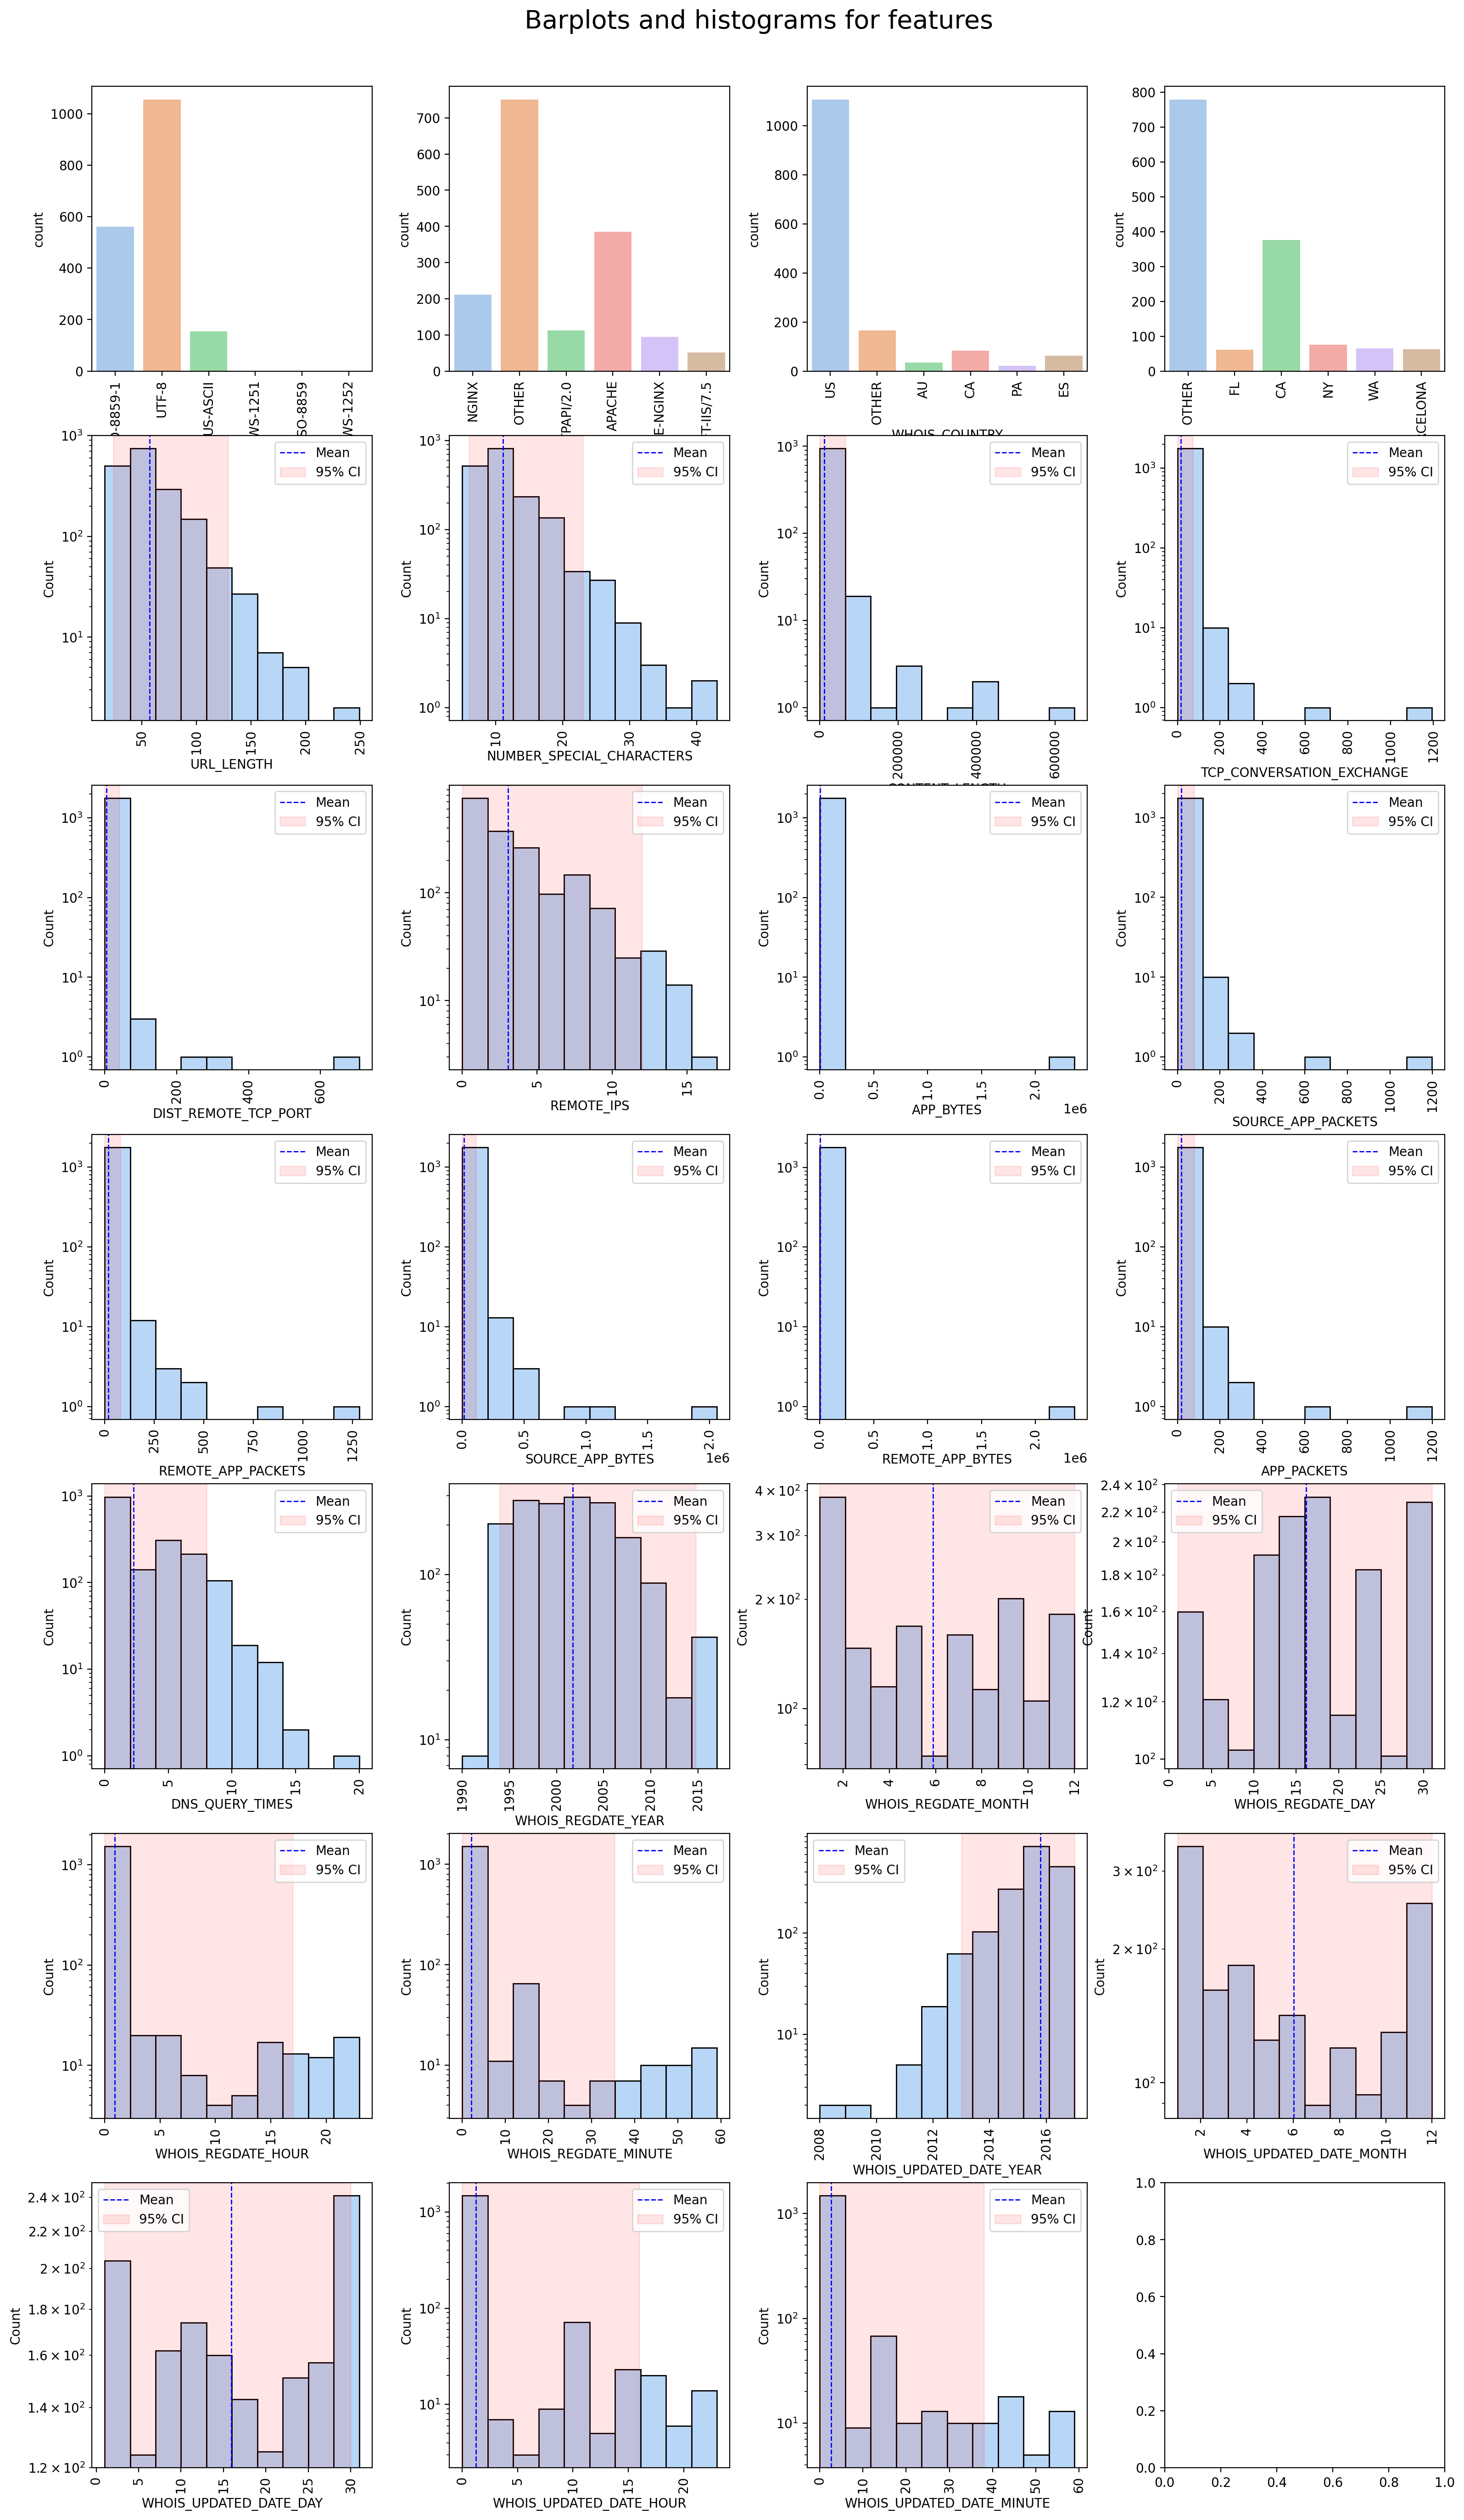

In [5]:
sns.set_palette("pastel")
cat_ftrs = df.columns[:4]
num_ftrs = df.columns[4:-1]

fig, ax = plt.subplots(7, 4, figsize=(16, 28))
fig.suptitle('Barplots and histograms for features', fontsize=20)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.95)
ax = ax.flatten()

NCAT = 6
i = 0
for c in df.columns[:-1]:
    if c in cat_ftrs:
        # Some categories are spelled lowercase, some uppercase
        df[c] = df[c].str.upper()
        divLine()
        if df[c].nunique() > NCAT:
            allowedCats = df[c].value_counts().head(NCAT - 1).index
            print(
                f'Unique values in {c} (Before tail cutting): {df[c].nunique()}'
            )
            for cat in df[c].unique():
                if cat not in allowedCats and cat is not np.nan:
                    df.loc[df[c] == cat, c] = 'OTHER'
            print(
                f'Unique values in {c} (After tail cutting): {df[c].nunique()}'
            )

        print(f'Unique values in {c}: {df[c].value_counts()}')
        sns.countplot(x=c, data=df, ax=ax[i]).tick_params(axis='x',
                                                          rotation=90)

    else:
        sns.histplot(x=c, data=df, ax=ax[i], log_scale=(False, True),
                     bins=10).tick_params(axis='x', rotation=90)
        ax[i].axvline(df[c].mean(),
                      color='blue',
                      linestyle='dashed',
                      linewidth=1,
                      label='Mean')
        ax[i].axvspan(df[c].quantile(0.025),
                      df[c].quantile(0.975),
                      alpha=0.1,
                      color='red',
                      label='95% CI')
        ax[i].legend()
    i += 1
divLine()
display(df[num_ftrs].describe())
plt.savefig('../figures/Features.pdf')

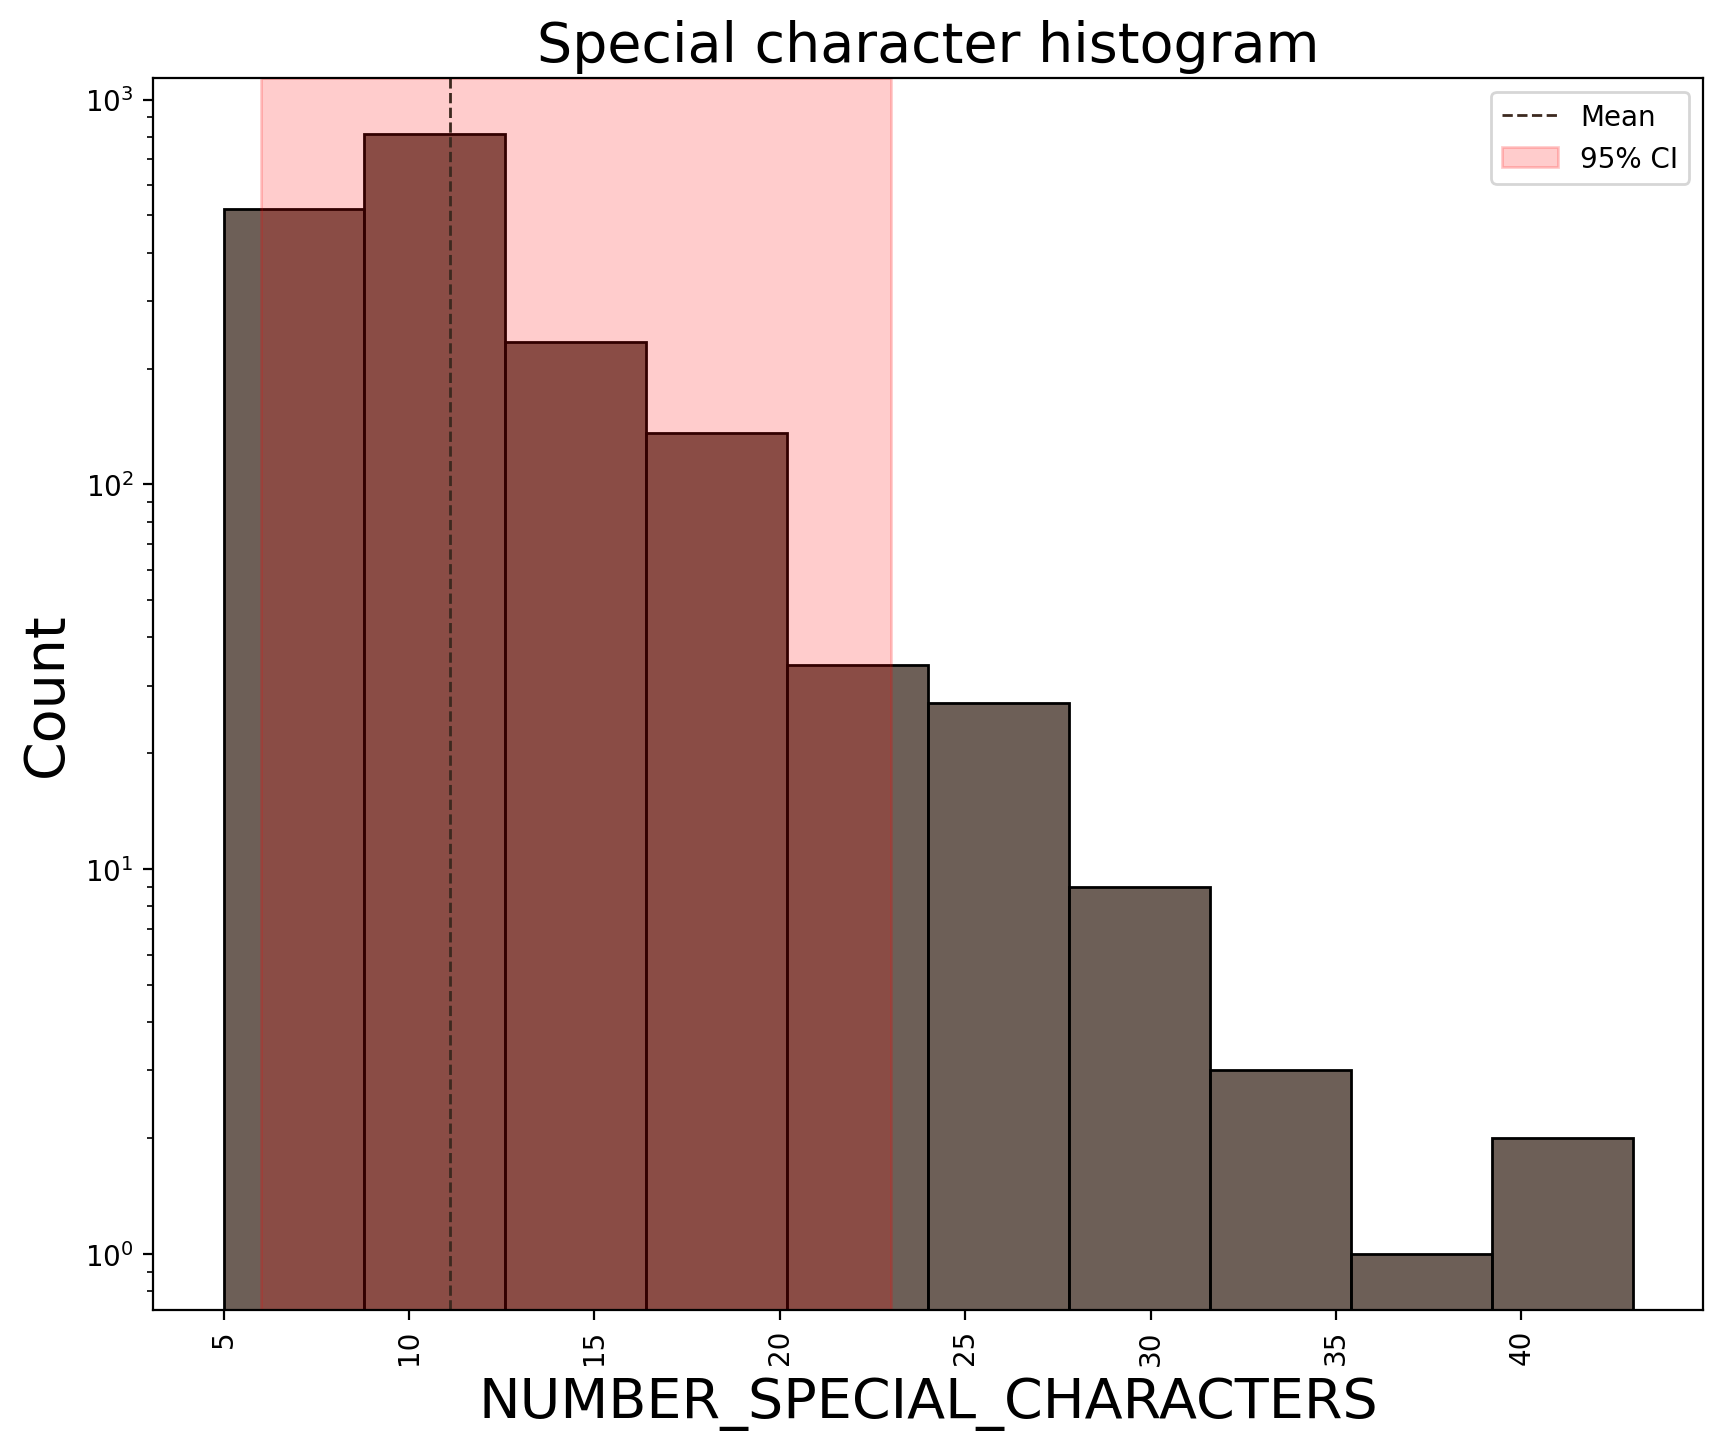

In [6]:
sns.set_palette(sns.color_palette(brown_colors))
plt.figure(figsize=(10, 8))
sns.histplot(x='NUMBER_SPECIAL_CHARACTERS',
             data=df,
             log_scale=(False, True),
             bins=10).tick_params(axis='x', rotation=90)
plt.axvline(df['NUMBER_SPECIAL_CHARACTERS'].mean(),
            color='blue',
            linestyle='dashed',
            linewidth=1,
            label='Mean',
            c=brown_colors[0])
plt.axvspan(df['NUMBER_SPECIAL_CHARACTERS'].quantile(0.025),
            df['NUMBER_SPECIAL_CHARACTERS'].quantile(0.975),
            alpha=0.2,
            color='red',
            label='95% CI')
plt.legend()
plt.xlabel('NUMBER_SPECIAL_CHARACTERS', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Special character histogram', fontsize=20)
plt.savefig('../figures/NUMBER_SPECIAL_CHARACTERS.pdf', dpi=400)
plt.savefig('../figures/NUMBER_SPECIAL_CHARACTERS.png', dpi=400)
sns.set_palette("pastel")

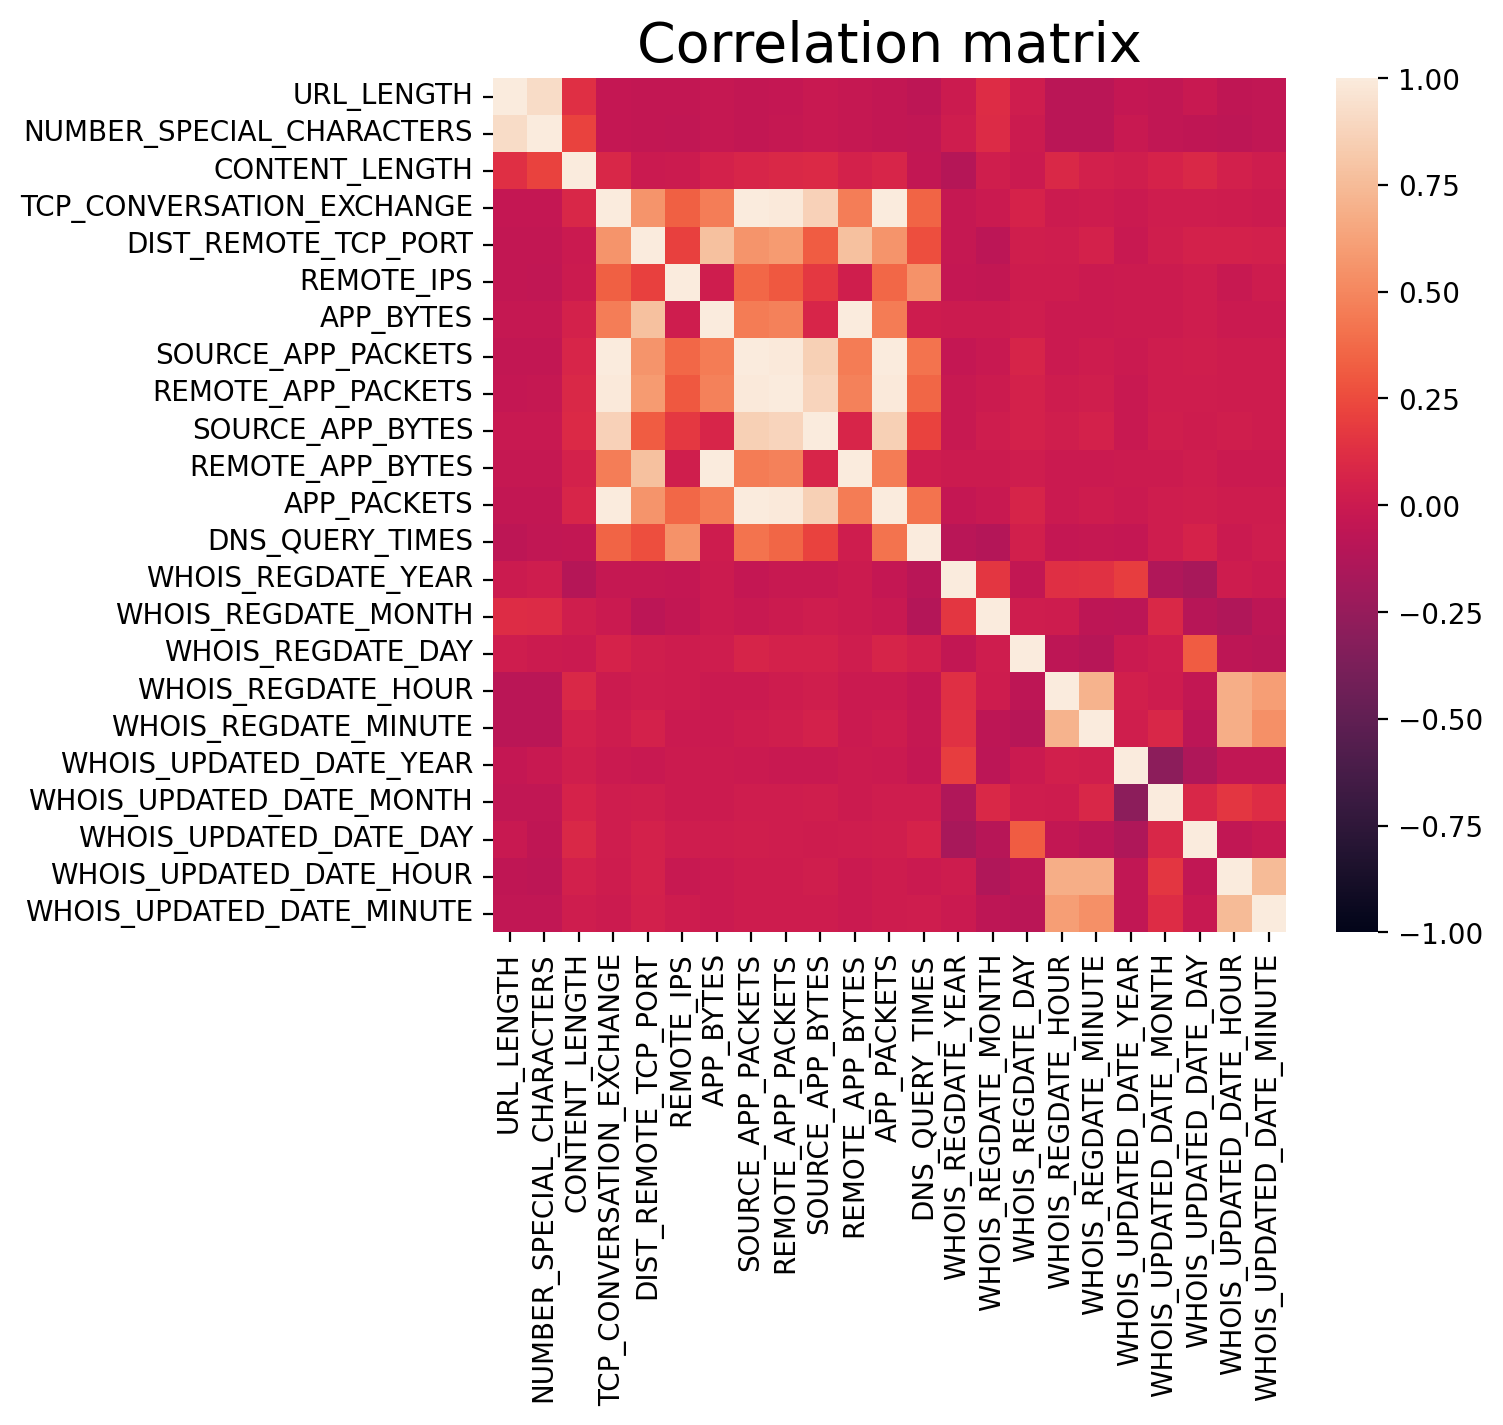

In [7]:
plt.subplots_adjust(top=1)
sns.heatmap(df[num_ftrs].corr(), vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.savefig('../figures/Correlation.pdf',
            dpi=400,
            bbox_inches='tight',
            pad_inches=0.1)
plt.savefig('../figures/Correlation.png',
            dpi=400,
            bbox_inches='tight',
            pad_inches=0.1)


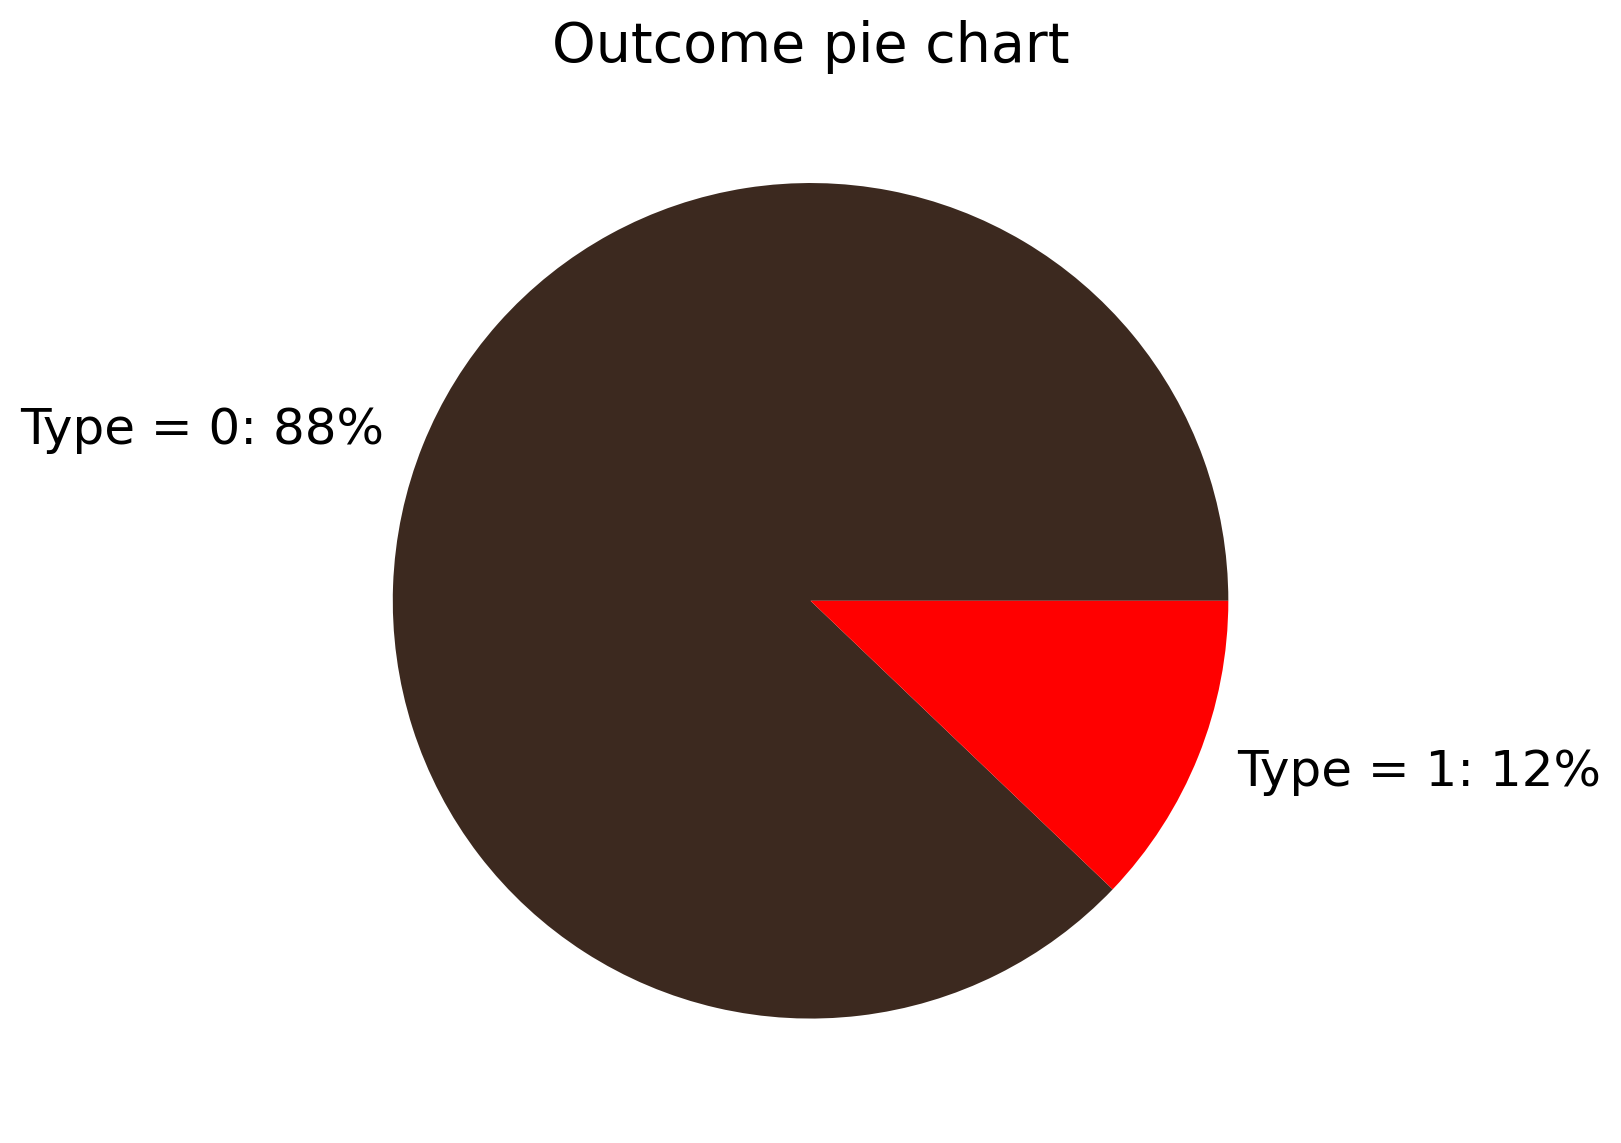

In [8]:
sns.set_palette(sns.color_palette(brown_colors))
plt.figure(figsize=(8, 8))
rel_values = df['Type'].value_counts(normalize=True).values * 100
lbls = [f'Type = {i}: {p:.0f}%' for i, p in enumerate(rel_values)]
plt.pie(df['Type'].value_counts(), labels=lbls, textprops={'fontsize': 18})
plt.title('Outcome pie chart', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/Balance.pdf')
plt.savefig('../figures/Balance.png', dpi=400)
sns.set_palette("pastel")

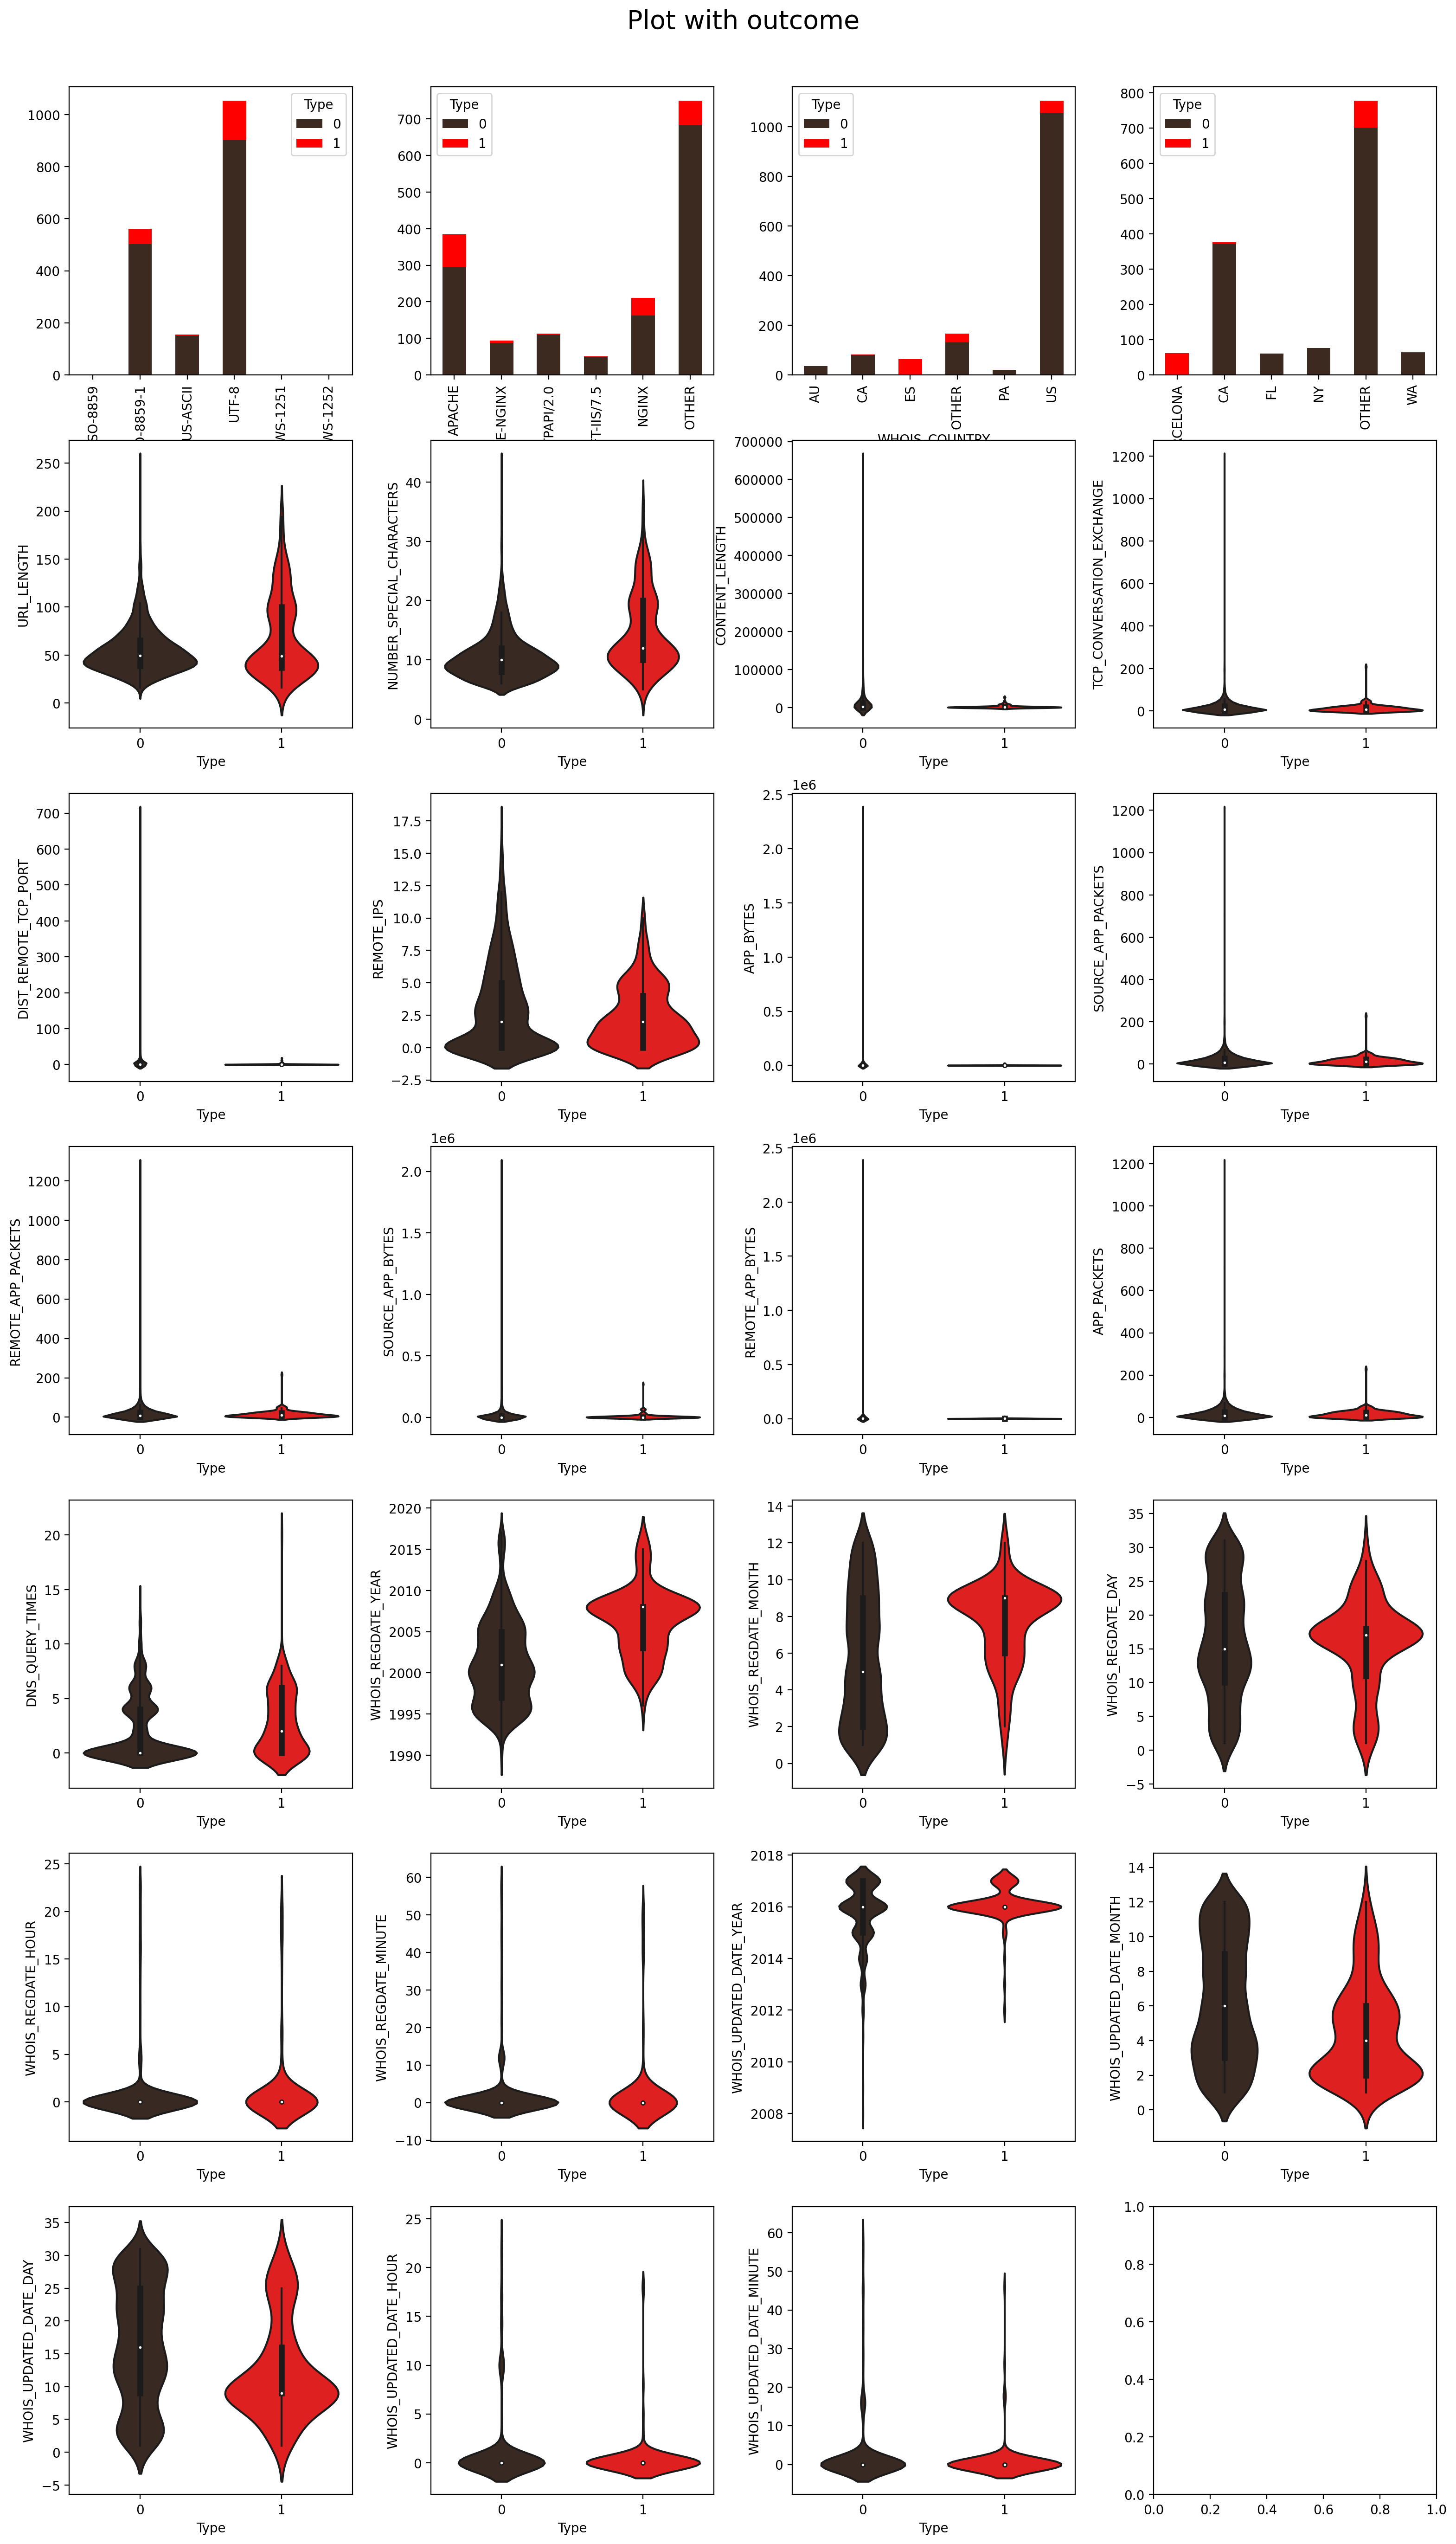

In [9]:
sns.set_palette(sns.color_palette(brown_colors))
fig, ax = plt.subplots(7, 4, figsize=(16, 28))
fig.suptitle('Plot with outcome', fontsize=20)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.95)
ax = ax.flatten()

i = 0
for c in df.columns[:-1]:
    if c in cat_ftrs:
        if df[c].nunique() <= 20:
            stacked = df.groupby(['Type', c
                                  ]).size().reset_index().pivot(columns='Type',
                                                                index=c,
                                                                values=0)
            stacked.plot(kind='bar', stacked=True, ax=ax[i])
            i += 1

    else:
        col_df = df[[c, 'Type']].dropna()
        sns.violinplot(
            [col_df[col_df['Type'] == 0][c], col_df[col_df['Type'] == 1][c]],
            ax=ax[i])
        ax[i].set_xlabel('Type')
        ax[i].set_ylabel(c)
        i += 1
plt.savefig('../figures/Outcome.pdf')
sns.set_palette("pastel")

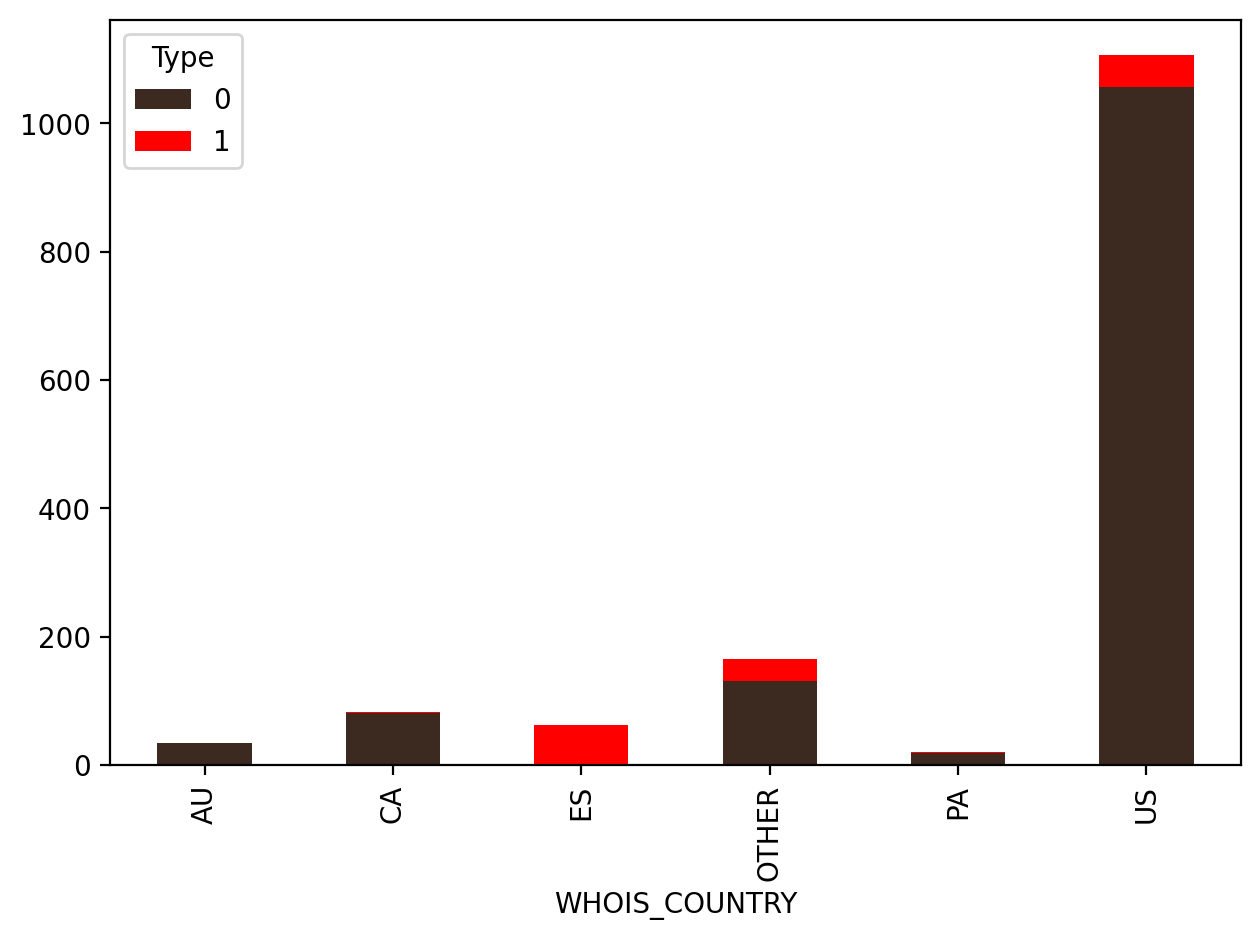

In [10]:
sns.set_palette(sns.color_palette(brown_colors))
stacked = df.groupby(['Type', 'WHOIS_COUNTRY'
                      ]).size().reset_index().pivot(columns='Type',
                                                    index='WHOIS_COUNTRY',
                                                    values=0)
stacked.plot(kind='bar', stacked=True)
plt.tight_layout()
plt.savefig('../figures/WHOIS_COUNTRY.pdf', dpi=400)
plt.savefig('../figures/WHOIS_COUNTRY.png', dpi=400)
sns.set_palette("pastel")

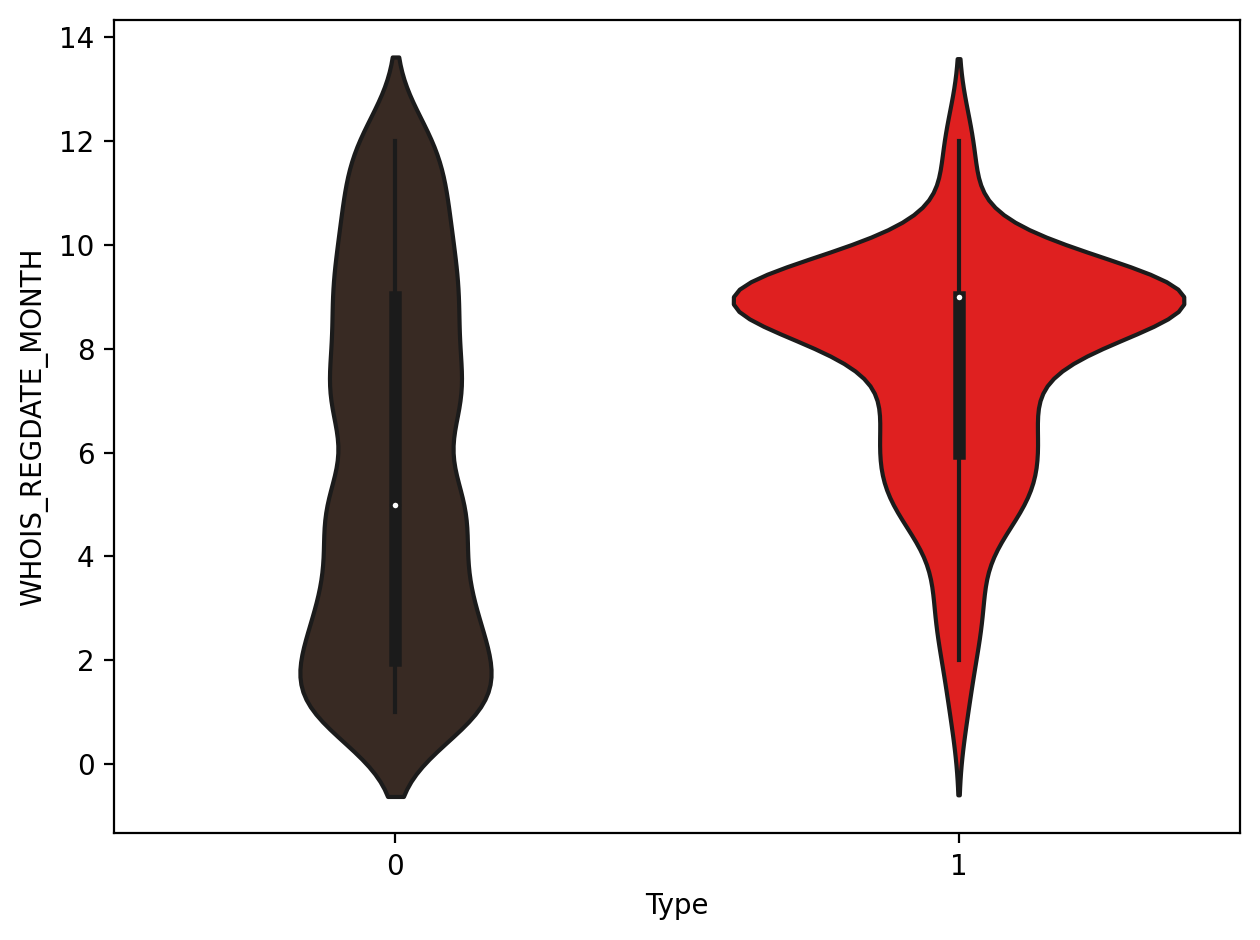

In [11]:
sns.set_palette(sns.color_palette(brown_colors))
col_df = df[['WHOIS_REGDATE_MONTH', 'Type']].dropna()
sns.violinplot([
    col_df[col_df['Type'] == 0]['WHOIS_REGDATE_MONTH'],
    col_df[col_df['Type'] == 1]['WHOIS_REGDATE_MONTH']
])
plt.xlabel('Type')
plt.ylabel('WHOIS_REGDATE_MONTH')
sns.set_palette("pastel")

plt.tight_layout()
plt.savefig('../figures/WHOIS_REGDATE_MONTH.pdf', dpi=400)
plt.savefig('../figures/WHOIS_REGDATE_MONTH.png', dpi=400)

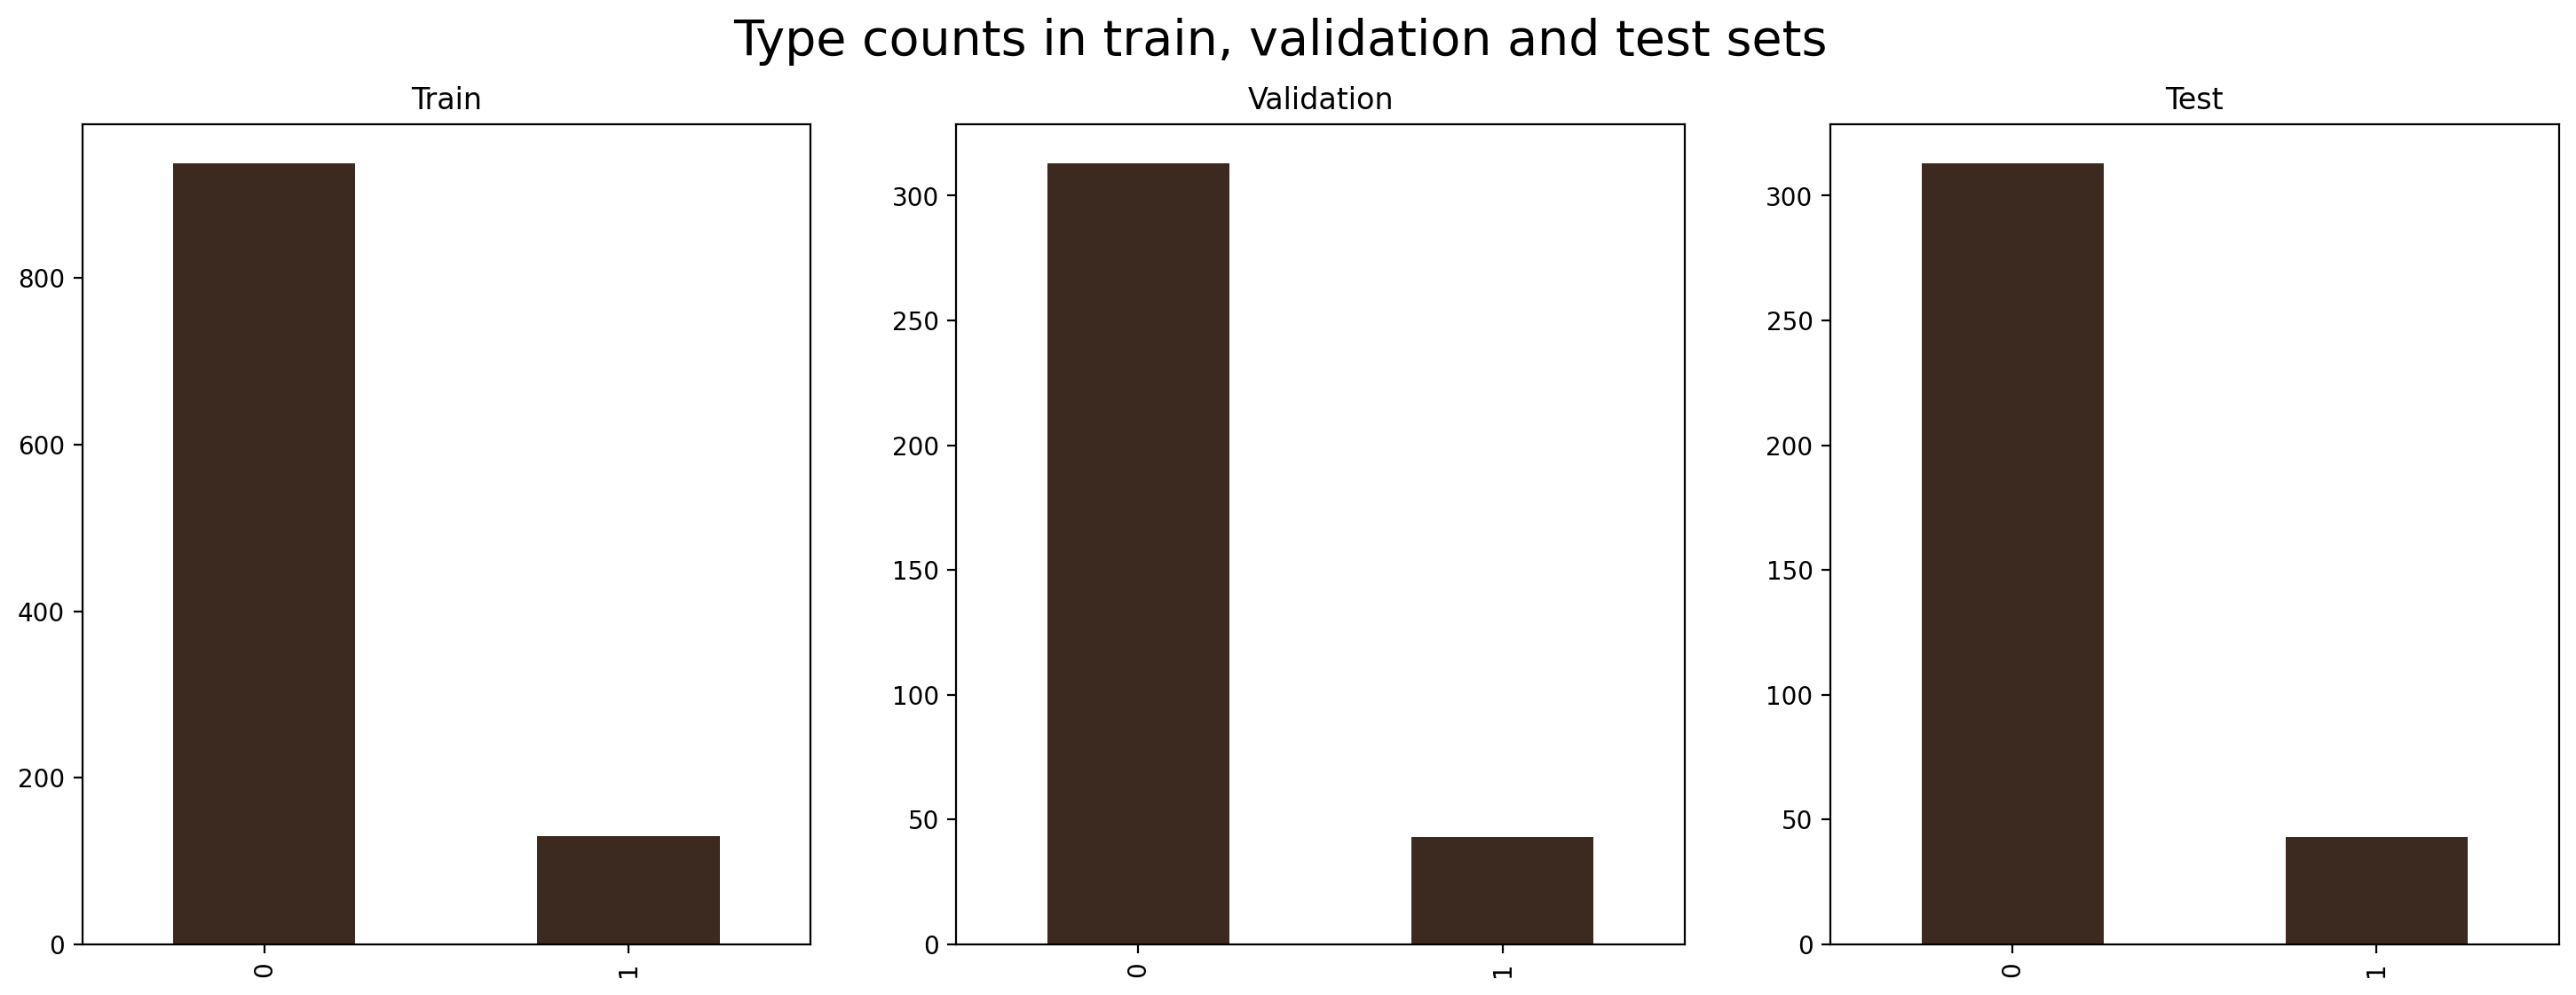

In [12]:
df.to_csv('../data/processed_dataset.csv', index=False)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Type'], axis=1),
                                                    df['Type'],
                                                    train_size=0.8,
                                                    stratify=df['Type'],
                                                    random_state=SEED)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  train_size=0.75,
                                                  stratify=y_train,
                                                  random_state=SEED)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Type counts in train, validation and test sets', fontsize=20)
for i, (d, t) in enumerate(
        zip((y_train, y_val, y_test), ('Train', 'Validation', 'Test'))):
    d.value_counts().plot(kind='bar', ax=ax[i], title=t, color='#3c291f')

plt.savefig('../figures/Split.pdf', dpi=400)
plt.savefig('../figures/Split.png', dpi=400)

In [13]:
X_train

,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,...,WHOIS_REGDATE_YEAR,WHOIS_REGDATE_MONTH,WHOIS_REGDATE_DAY,WHOIS_REGDATE_HOUR,WHOIS_REGDATE_MINUTE,WHOIS_UPDATED_DATE_YEAR,WHOIS_UPDATED_DATE_MONTH,WHOIS_UPDATED_DATE_DAY,WHOIS_UPDATED_DATE_HOUR,WHOIS_UPDATED_DATE_MINUTE
1127,ISO-8859-1,APACHE,US,OTHER,57,11,10280.0,0,0,0,...,2006,9,3,0,0,2017,2,23,0,0
428,UTF-8,OTHER,NaN,NaN,39,9,NaN,0,0,0,...,2007,1,7,5,40,2016,8,12,14,1
1391,UTF-8,OTHER,OTHER,NaN,71,12,318.0,25,3,5,...,2005,3,15,0,0,2016,6,28,0,0
414,ISO-8859-1,OTHER,US,CA,38,9,220.0,0,0,0,...,2002,8,8,0,0,2015,7,29,0,0
269,ISO-8859-1,NGINX,US,OTHER,34,7,1501.0,23,3,11,...,1999,12,22,0,0,2012,5,24,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,UTF-8,NaN,US,NY,78,13,28508.0,8,6,6,...,1995,10,8,0,0,2016,5,8,0,0
1306,UTF-8,NaN,US,OTHER,66,11,9405.0,15,2,4,...,2003,1,2,16,44,2017,2,2,17,11
478,US-ASCII,MICROSOFT-HTTPAPI/2.0,OTHER,OTHER,39,8,324.0,12,6,9,...,2008,10,28,0,0,2016,3,4,0,0
1707,UTF-8,APACHE,US,OTHER,116,18,NaN,23,17,8,...,2001,12,6,20,58,2016,10,6,13,57


In [14]:
categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')
            ), ('onehot',
                OneHotEncoder(sparse=False, handle_unknown='ignore'))])

numeric_transformer = Pipeline(
    steps=[('iterative_imputer',
            IterativeImputer(random_state=SEED)), ('scaler',
                                                   StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer,
                   num_ftrs), ('cat', categorical_transformer, cat_ftrs)])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_train, columns=feature_names)
df_val = pd.DataFrame(data=X_val, columns=feature_names)
df_test = pd.DataFrame(data=X_test, columns=feature_names)
divLine()
print('Train set shape', df_train.shape)
display(df_train.head())

--------------------------------------------------
Train set shape (1068, 51)


,num__URL_LENGTH,num__NUMBER_SPECIAL_CHARACTERS,num__CONTENT_LENGTH,num__TCP_CONVERSATION_EXCHANGE,num__DIST_REMOTE_TCP_PORT,num__REMOTE_IPS,num__APP_BYTES,num__SOURCE_APP_PACKETS,num__REMOTE_APP_PACKETS,num__SOURCE_APP_BYTES,...,cat__WHOIS_COUNTRY_OTHER,cat__WHOIS_COUNTRY_PA,cat__WHOIS_COUNTRY_US,cat__WHOIS_STATEPRO_BARCELONA,cat__WHOIS_STATEPRO_CA,cat__WHOIS_STATEPRO_FL,cat__WHOIS_STATEPRO_MISSING,cat__WHOIS_STATEPRO_NY,cat__WHOIS_STATEPRO_OTHER,cat__WHOIS_STATEPRO_WA
0,0.036489,-0.000428,0.003536,-0.479234,-0.218974,-0.903499,-0.053240,-0.525824,-0.456265,-0.271148,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.654609,-0.457506,0.024617,-0.479234,-0.218974,-0.903499,-0.053240,-0.525824,-0.456265,-0.271148,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.574009,0.228111,-0.075288,0.250273,-0.107575,0.580563,-0.005803,0.290222,0.091762,0.191333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.693003,-0.457506,-0.076063,-0.479234,-0.218974,-0.903499,-0.053240,-0.525824,-0.456265,-0.271148,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.846580,-0.914584,-0.065927,0.191912,-0.107575,2.361436,-0.024982,0.290222,0.234725,-0.140051,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


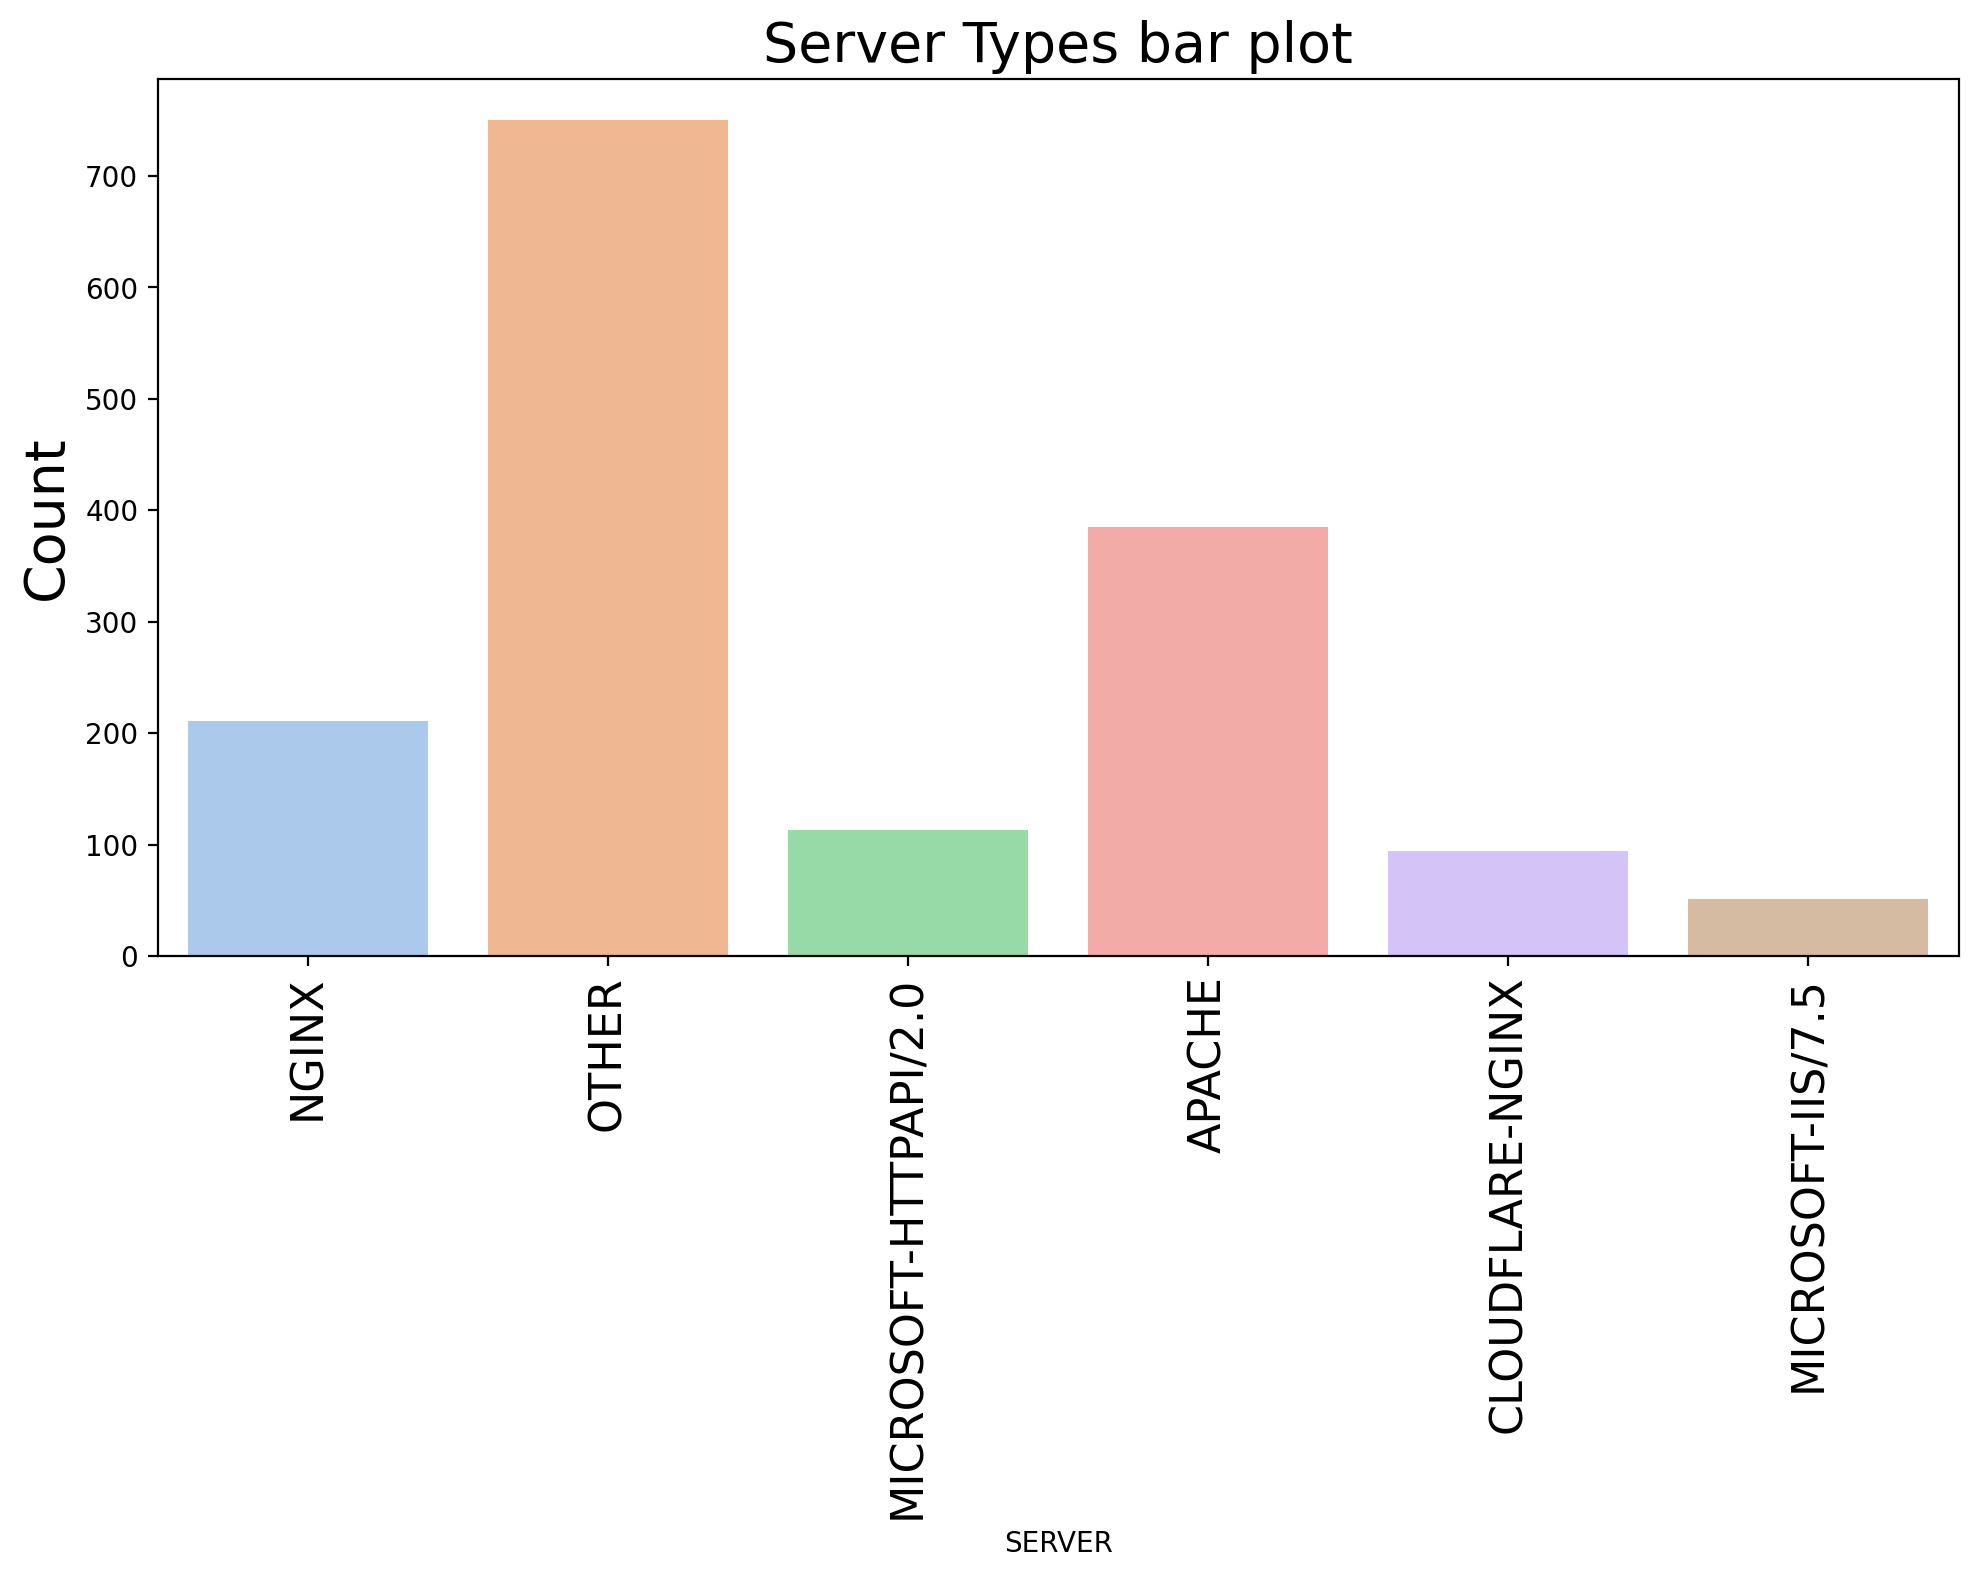

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(x='SERVER', data=df).tick_params(axis='x',
                                               rotation=90,
                                               labelsize=16)
plt.ylabel('Count', fontsize=20)
plt.title('Server Types bar plot', fontsize=20)
plt.tight_layout()
plt.savefig('../figures/SERVER_POST.pdf', dpi=400)
plt.savefig('../figures/SERVER_POST.png', dpi=400)

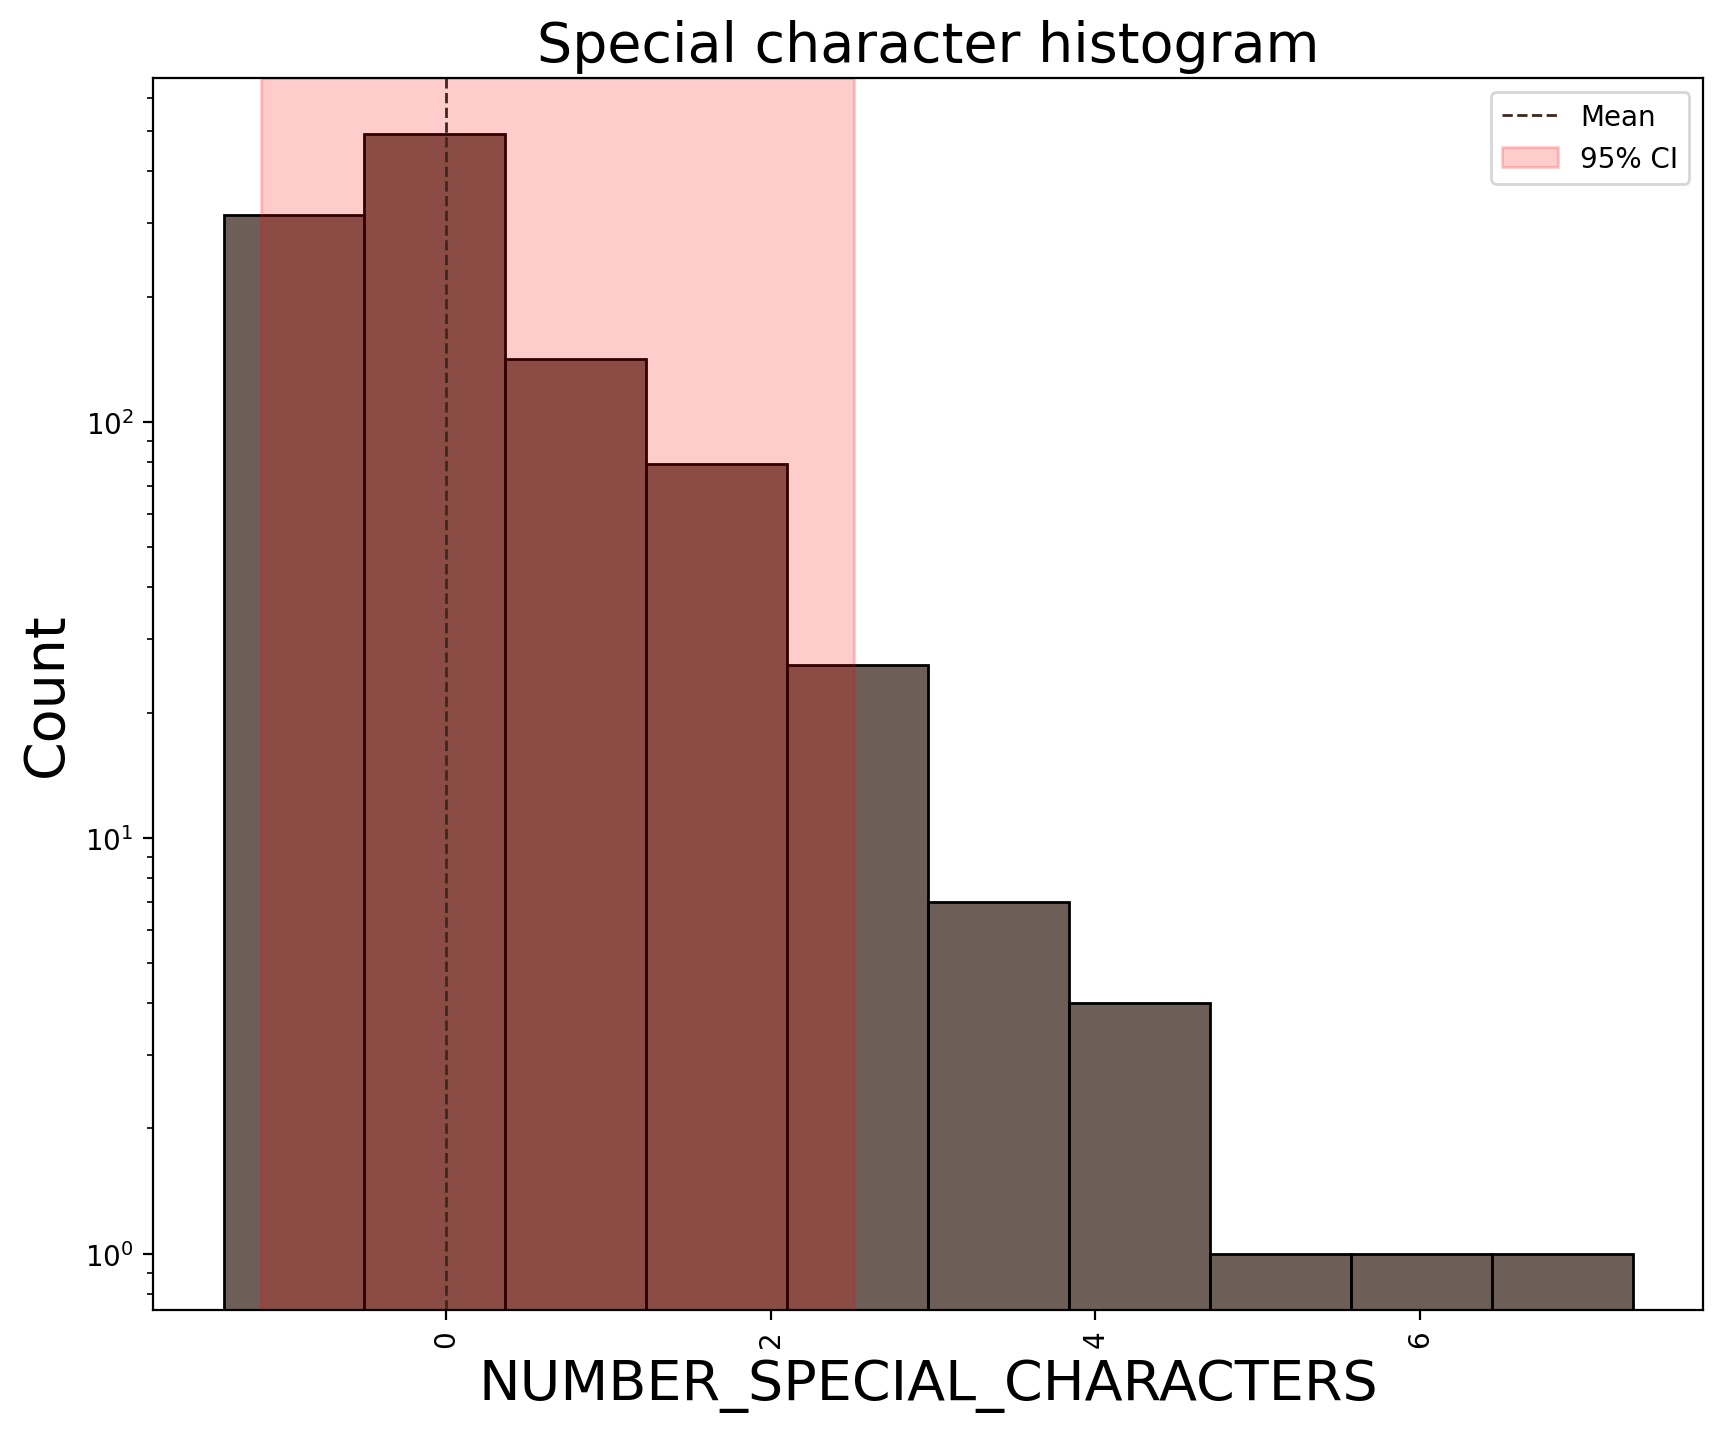

In [16]:
sns.set_palette(sns.color_palette(brown_colors))
plt.figure(figsize=(10, 8))
sns.histplot(x='num__NUMBER_SPECIAL_CHARACTERS',
             data=df_train,
             log_scale=(False, True),
             bins=10).tick_params(axis='x', rotation=90)
plt.axvline(df_train['num__NUMBER_SPECIAL_CHARACTERS'].mean(),
            color='blue',
            linestyle='dashed',
            linewidth=1,
            label='Mean',
            c=brown_colors[0])
plt.axvspan(df_train['num__NUMBER_SPECIAL_CHARACTERS'].quantile(0.025),
            df_train['num__NUMBER_SPECIAL_CHARACTERS'].quantile(0.975),
            alpha=0.2,
            color='red',
            label='95% CI')
plt.legend()
plt.xlabel('NUMBER_SPECIAL_CHARACTERS', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Special character histogram', fontsize=20)
plt.savefig('../figures/NUMBER_SPECIAL_CHARACTERS_POST.pdf', dpi=400)
plt.savefig('../figures/NUMBER_SPECIAL_CHARACTERS_POST.png', dpi=400)
sns.set_palette("pastel")

In [17]:
#from imblearn.over_sampling import SMOTENC
# Split
# Fill NA
# SMOTE-NC upsampling
# Encode/Scale
#sm = SMOTENC(random_state=SEED, categorical_features=[0,1,2,3])
#sm.fit(X_train.to_numpy(), y_train.to_numpy())

In [18]:
"""'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'URL_LENGTH',
       'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'WHOIS_REGDATE_YEAR', 'WHOIS_REGDATE_MONTH',
       'WHOIS_REGDATE_DAY', 'WHOIS_REGDATE_HOUR', 'WHOIS_REGDATE_MINUTE',
       'WHOIS_UPDATED_DATE_YEAR', 'WHOIS_UPDATED_DATE_MONTH',
       'WHOIS_UPDATED_DATE_DAY', 'WHOIS_UPDATED_DATE_HOUR',
       'WHOIS_UPDATED_DATE_MINUTE', 'Type'""".replace("'", '').replace(
    "\n", '').replace(" ", '').split(',')


['CHARSET',
 'SERVER',
 'WHOIS_COUNTRY',
 'WHOIS_STATEPRO',
 'URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'REMOTE_IPS',
 'APP_BYTES',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES',
 'WHOIS_REGDATE_YEAR',
 'WHOIS_REGDATE_MONTH',
 'WHOIS_REGDATE_DAY',
 'WHOIS_REGDATE_HOUR',
 'WHOIS_REGDATE_MINUTE',
 'WHOIS_UPDATED_DATE_YEAR',
 'WHOIS_UPDATED_DATE_MONTH',
 'WHOIS_UPDATED_DATE_DAY',
 'WHOIS_UPDATED_DATE_HOUR',
 'WHOIS_UPDATED_DATE_MINUTE',
 'Type']